## Load the library

In [2]:
## Import all relevant libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, RobustScaler

## Read the data

In [ ]:
# instant: record index
dteday : date
season : season (1:springer, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
weekday : day of the week 0-monday , 1-tuesday, 2-wednesday, 3-thursday, 4-friday, 5-Saturday ,6-Sunday
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit : 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : Normalized temperature in Celsius. The values are divided to 41 (max)
atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered

In [4]:
## Load the data from your file or data source.

In [34]:
df = pd.read_csv('I:/Python Work sheets/bike_sharing_daily.csv',na_values=['N/A', 'NIL'])

In [6]:
## Show first 5 rows

In [35]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
## Show last 5 rows

In [36]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [10]:
## Show the info for data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [38]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [39]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
df.describe(include="O").columns

Index(['dteday'], dtype='object')

In [15]:
## Show the columns

In [41]:
column_list = df.columns
column_list

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
## Show the description summary for numerical and categorical values.

In [42]:
categorical_columns = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday'] 
num_cols = [ 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

# Exploratory Data Analysis

In [43]:
df['actual_temp'] = df['temp'] *41
df.replace({False:'temp',True:'actual_temp'},inplace=True)
df.reset_index(drop=True,inplace=True)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,actual_temp
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,10.420847
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,10.386653
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,10.386653
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,10.489153


In [44]:
df['feellike_temp'] = df['atemp'] *50
df.replace({False:'atemp',True:'feellike_temp'},inplace=True)
df.reset_index(drop=True,inplace=True)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,actual_temp,feellike_temp
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,10.420847,11.33210
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,10.386653,12.75230
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,10.386653,12.12000
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,10.489153,11.58500


In [45]:
df['humidity'] = df['hum'] *100
df.replace({False:'hum',True:'humidity'},inplace=True)
df.reset_index(drop=True,inplace=True)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,actual_temp,feellike_temp,humidity
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125,80.5833
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695,69.6087
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025,43.7273
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610,59.0435
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350,43.6957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,10.420847,11.33210,65.2917
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,10.386653,12.75230,59.0000
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,10.386653,12.12000,75.2917
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,10.489153,11.58500,48.3333


hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)

In [46]:
df['windspeeds'] = df['windspeed'] *67
df.replace({False:'windspeed',True:'windspeeds'},inplace=True)
df.reset_index(drop=True,inplace=True)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,actual_temp,feellike_temp,humidity,windspeeds
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125,80.5833,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695,69.6087,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025,43.7273,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610,59.0435,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,10.420847,11.33210,65.2917,23.458911
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,10.386653,12.75230,59.0000,10.416557
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,10.386653,12.12000,75.2917,8.333661
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,10.489153,11.58500,48.3333,23.500518


In [47]:
df=df.round({'windspeeds': 2, 'humidity': 2,'feellike_temp':2 ,'actual_temp':2})
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,actual_temp,feellike_temp,humidity,windspeeds
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.11,18.18,80.58,10.75
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.90,17.69,69.61,16.65
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.05,9.47,43.73,16.64
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.20,10.61,59.04,10.74
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.31,11.46,43.70,12.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,10.42,11.33,65.29,23.46
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,10.39,12.75,59.00,10.42
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,10.39,12.12,75.29,8.33
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,10.49,11.58,48.33,23.50


In [49]:
df.drop(columns = [ 'dteday',"instant","temp", "atemp", "hum", "windspeed"],inplace = True,axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt,actual_temp,feellike_temp,humidity,windspeeds
0,1,0,1,0,6,0,2,331,654,985,14.11,18.18,80.58,10.75
1,1,0,1,0,0,0,2,131,670,801,14.90,17.69,69.61,16.65
2,1,0,1,0,1,1,1,120,1229,1349,8.05,9.47,43.73,16.64
3,1,0,1,0,2,1,1,108,1454,1562,8.20,10.61,59.04,10.74
4,1,0,1,0,3,1,1,82,1518,1600,9.31,11.46,43.70,12.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,247,1867,2114,10.42,11.33,65.29,23.46
727,1,1,12,0,5,1,2,644,2451,3095,10.39,12.75,59.00,10.42
728,1,1,12,0,6,0,2,159,1182,1341,10.39,12.12,75.29,8.33
729,1,1,12,0,0,0,1,364,1432,1796,10.49,11.58,48.33,23.50


In [25]:
column_list = df.columns
column_list

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'casual', 'registered', 'cnt', 'actual_temp',
       'feellike_temp', 'humidity', 'windspeeds'],
      dtype='object')

In [26]:
categorical_columns = [ 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday'] 
num_cols = [  'feellike_temp', 'actual_temp', 'humidity', 'windspeeds',
       'casual', 'registered', 'cnt']

## Do Numerical Analysis of Columns

In [27]:
#  Numerical column analysis 

#  Maximum and mimimum value mean, meadian or std deviation or variance

#  You can learn about their distribution.
# - Histogram.
#  While a histogram is made up of bars that touch each other,it shows counts of values in each range.

# - Distribution plot. 
#  While a density plot shows the proportion of values in each range, a density plot is a smooth curve 
# that shows the distribution of the data in a more continuous way

# Asymmetry 
# Skewness is a statistical measure of the asymmetry of a probability distribution. 
# It characterizes the extent to which the distribution of a set of values deviates from a normal distribution.
# If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
# If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
# If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

# Quantile Analysis
# A quantile defines a particular part of a data set, 
# i.e. a quantile determines how many values in a distribution are above or below a certain limit.

# Analysis of extreme value
# - Box Plot
# - Violin plot

____________________ feellike_temp ____________________
mean of : 23.717783857729135
min of:  3.95
max of:  42.04
std of  feellike_temp :  8.148006127213506
variance  of  feellike_temp :  66.39000384910885
skewness of  feellike_temp :  -0.13120261619196177
Quantile of  feellike_temp :  12.75 16.895 24.34 30.43 33.9
Null Percentage of the  feellike_temp :  0.0


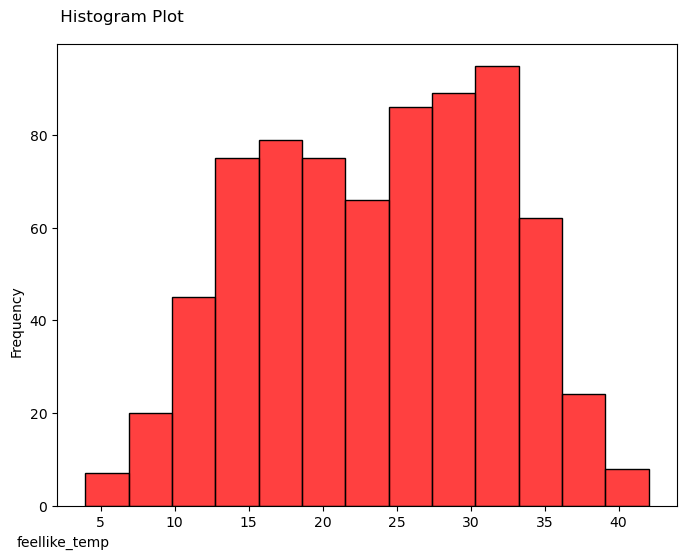

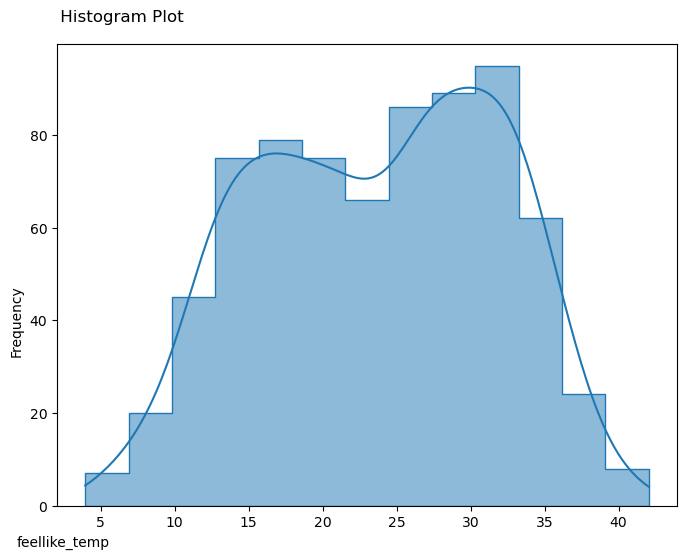

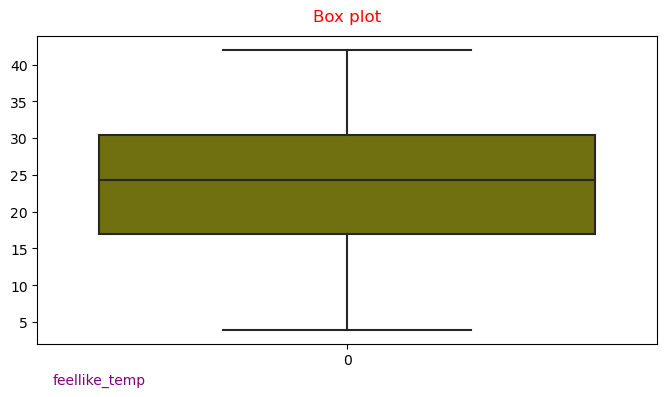

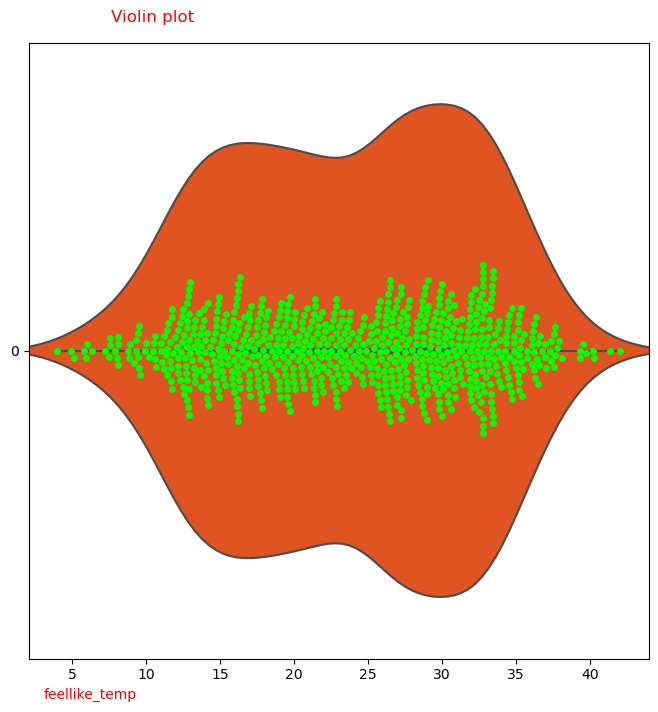

____________________ actual_temp ____________________
mean of : 20.310820793433653
min of:  2.42
max of:  35.33
std of  actual_temp :  7.505176908059242
variance  of  actual_temp :  56.32768042126568
skewness of  actual_temp :  -0.05453487774938229
Quantile of  actual_temp :  10.66 13.82 20.43 26.875 30.0
Null Percentage of the  actual_temp :  0.0


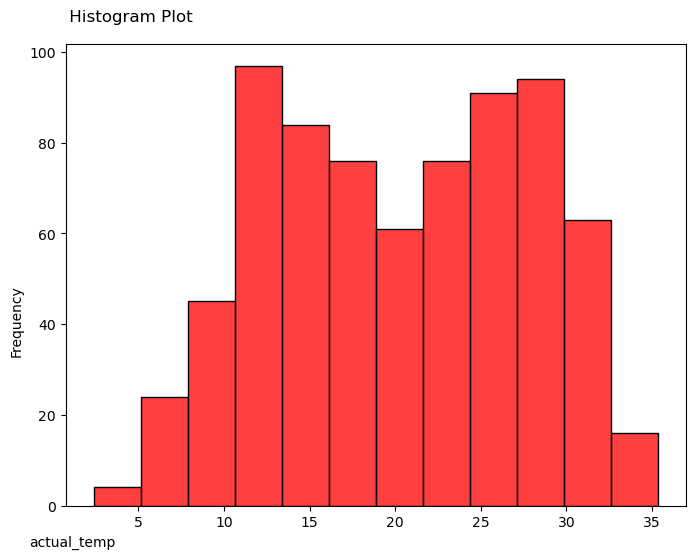

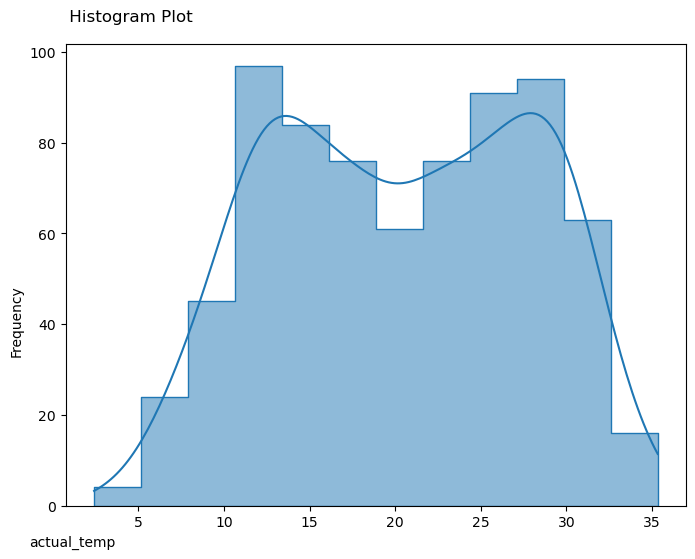

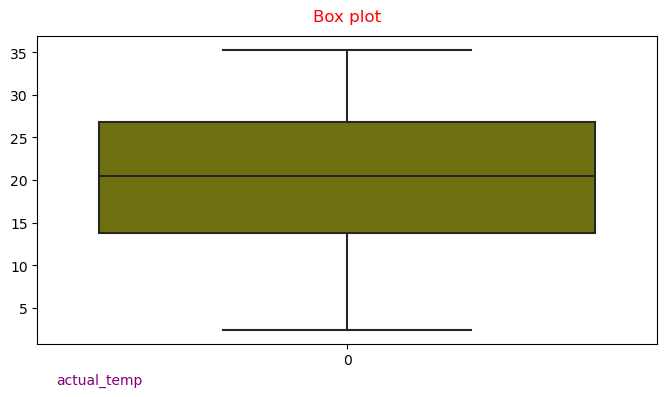

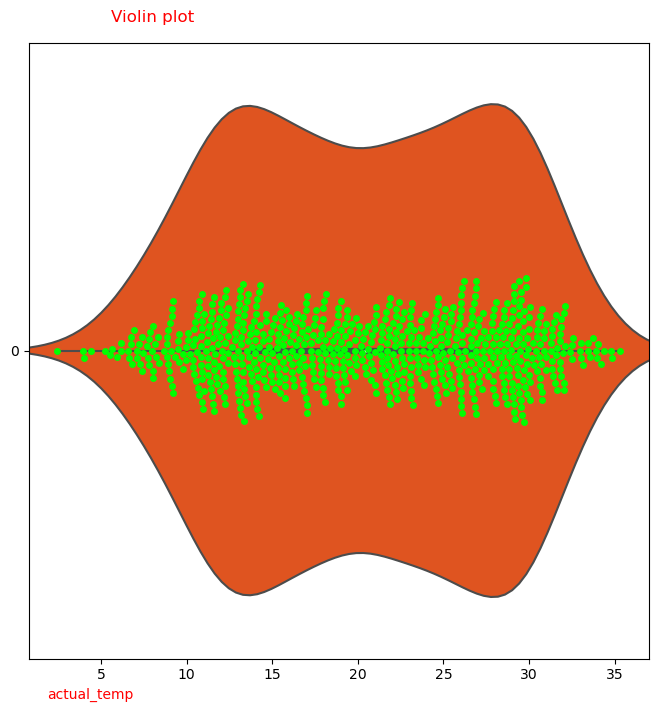

____________________ humidity ____________________
mean of : 62.78935704514363
min of:  0.0
max of:  97.25
std of  humidity :  14.242922866386081
variance  of  humidity :  202.8608517778235
skewness of  humidity :  -0.06981012463707852
Quantile of  humidity :  45.0 52.0 62.67 73.02000000000001 81.75
Null Percentage of the  humidity :  0.0


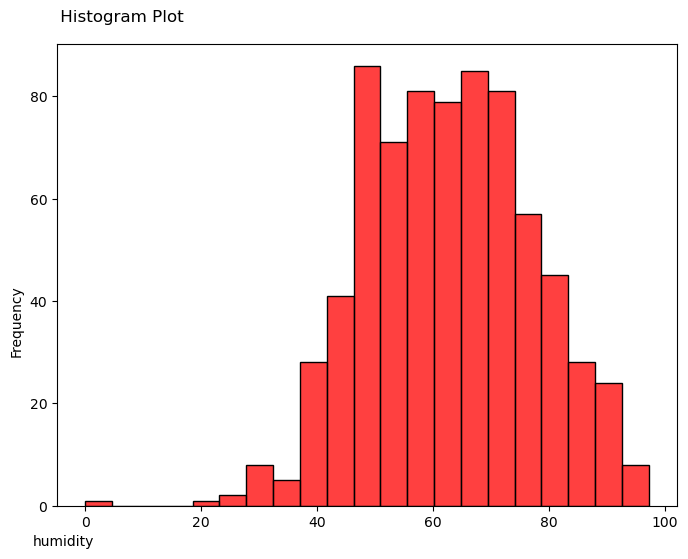

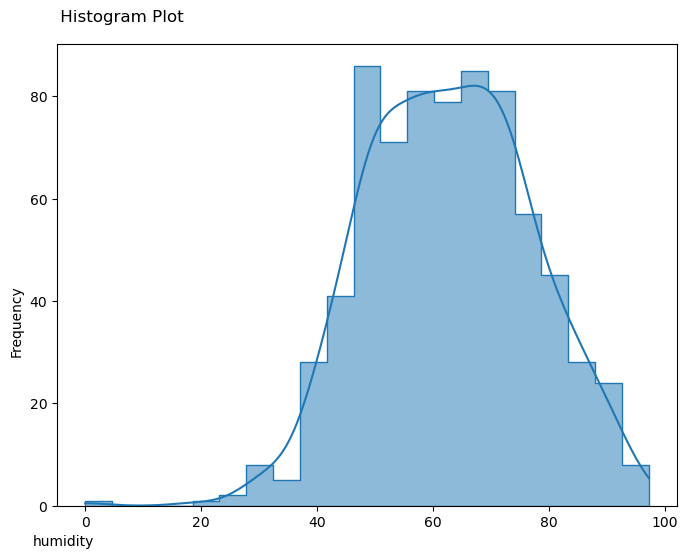

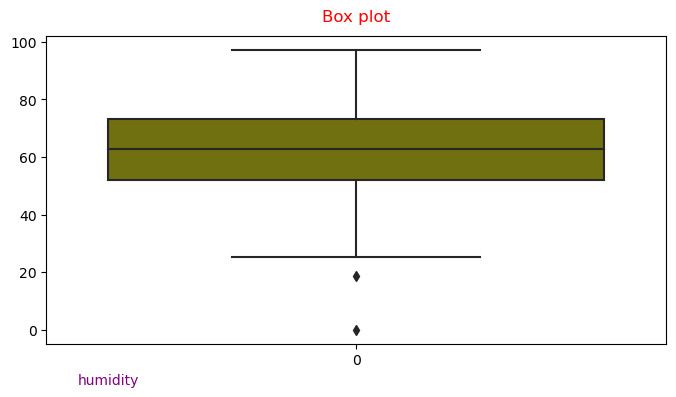

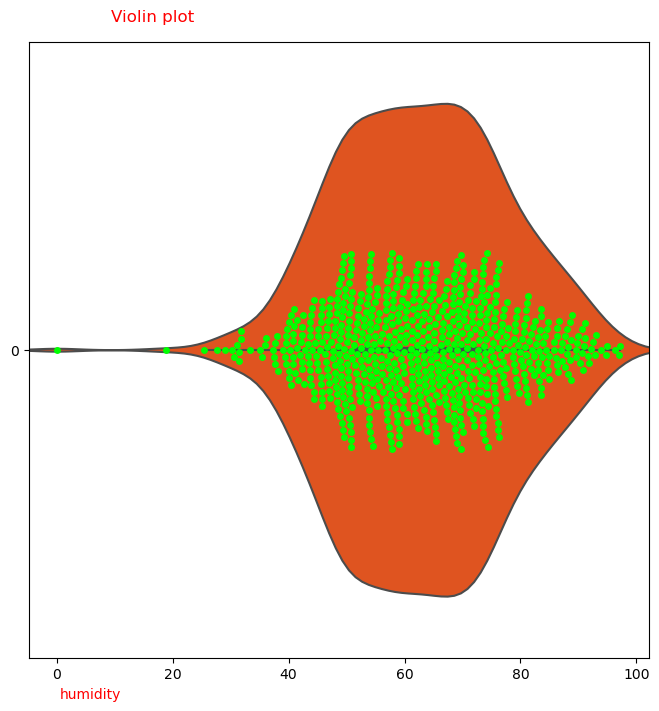

____________________ windspeeds ____________________
mean of : 12.76265389876881
min of:  1.5
max of:  34.0
std of  windspeeds :  5.192157290638907
variance  of  windspeeds :  26.958497330734748
skewness of  windspeeds :  0.6773590458099532
Quantile of  windspeeds :  6.71 9.04 12.13 15.625 19.83
Null Percentage of the  windspeeds :  0.0


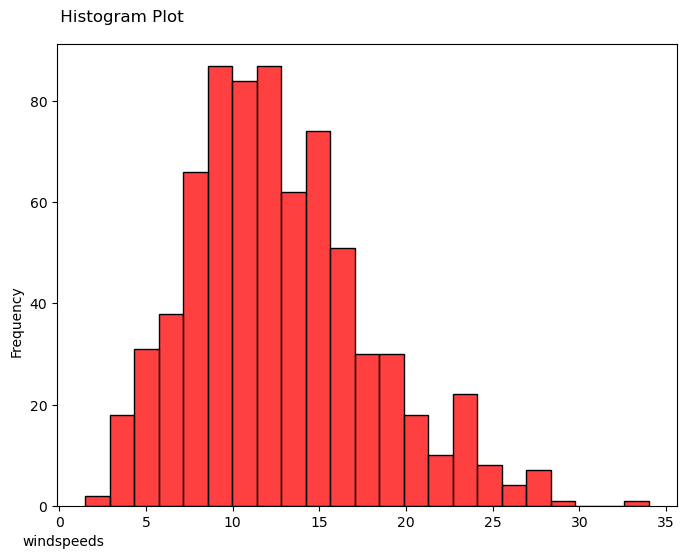

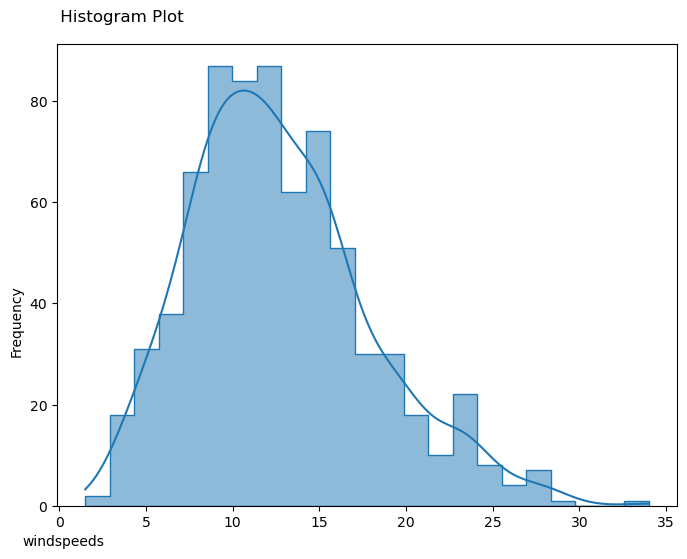

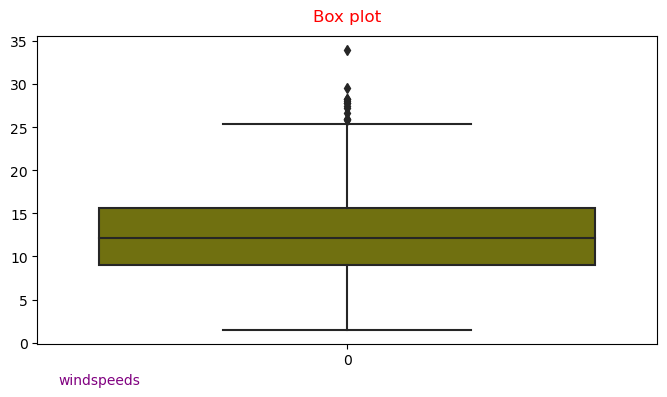

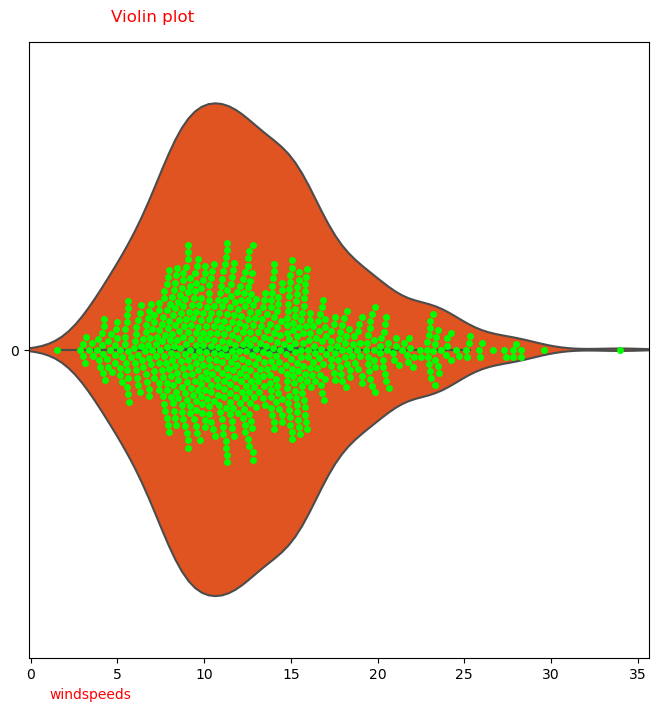

____________________ casual ____________________
mean of : 848.1764705882352
min of:  2
max of:  3410
std of  casual :  686.6224882846549
variance  of  casual :  471450.4414182111
skewness of  casual :  1.2664540319434734
Quantile of  casual :  139.0 315.5 713.0 1096.0 1869.0
Null Percentage of the  casual :  0.0


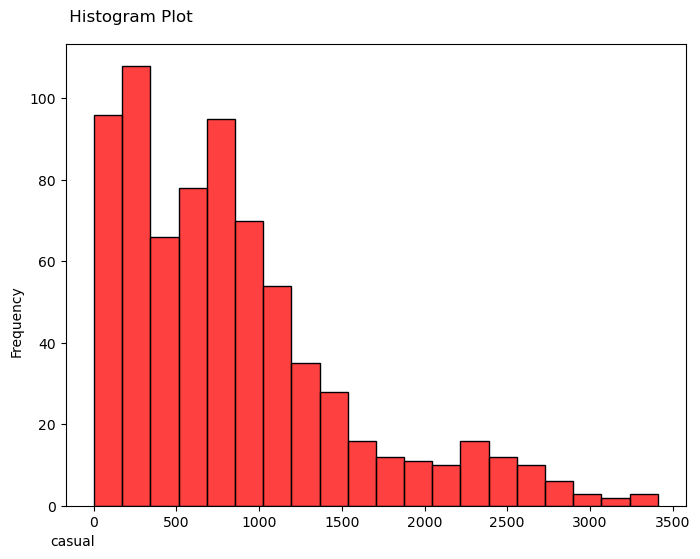

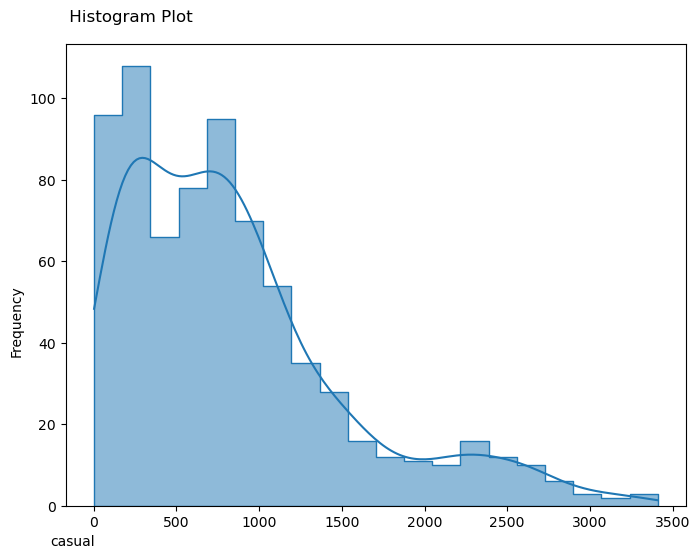

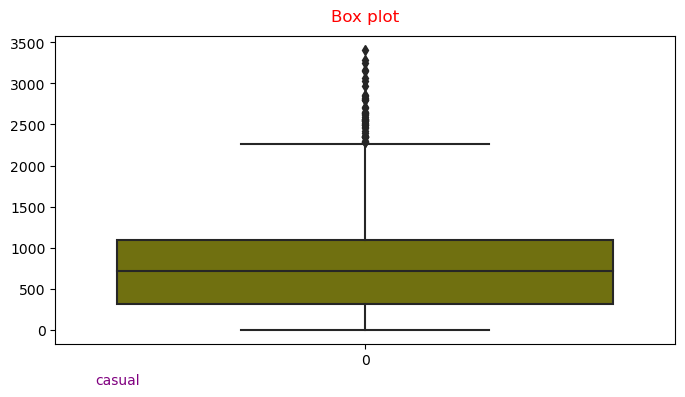

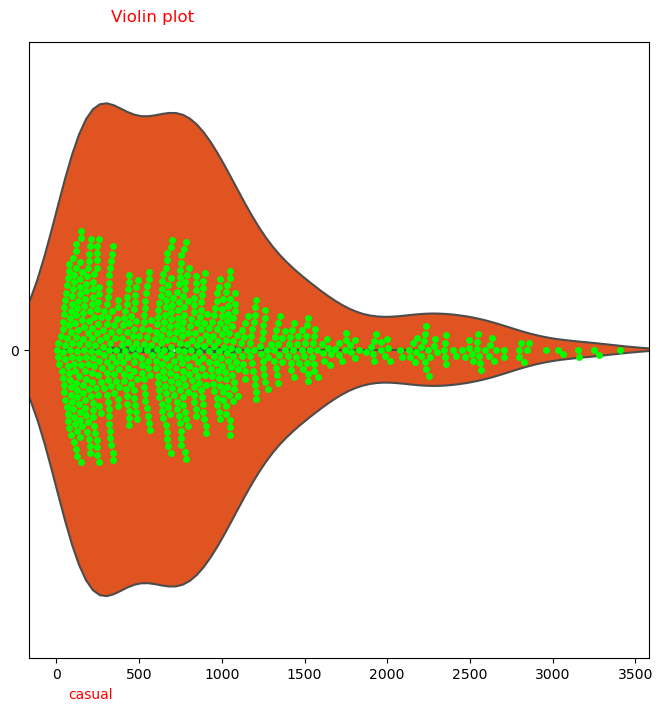

____________________ registered ____________________
mean of : 3656.172366621067
min of:  20
max of:  6946
std of  registered :  1560.2563770194527
variance  of  registered :  2434399.9620298687
skewness of  registered :  0.04365877988903687
Quantile of  registered :  1506.0 2497.0 3662.0 4776.5 5893.0
Null Percentage of the  registered :  0.0


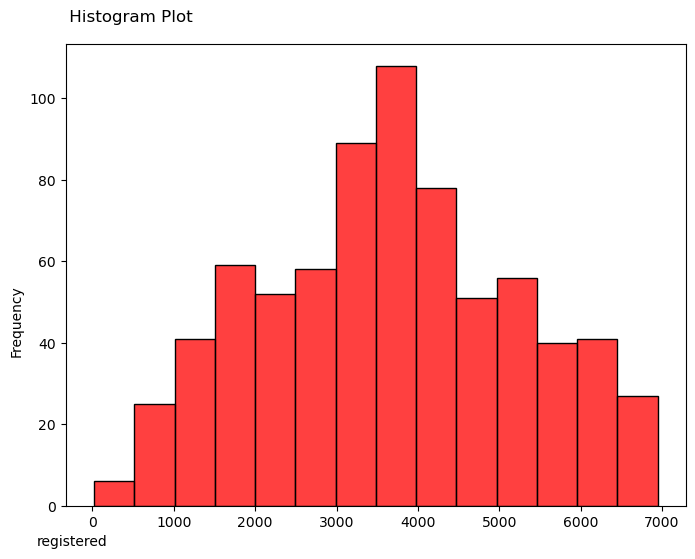

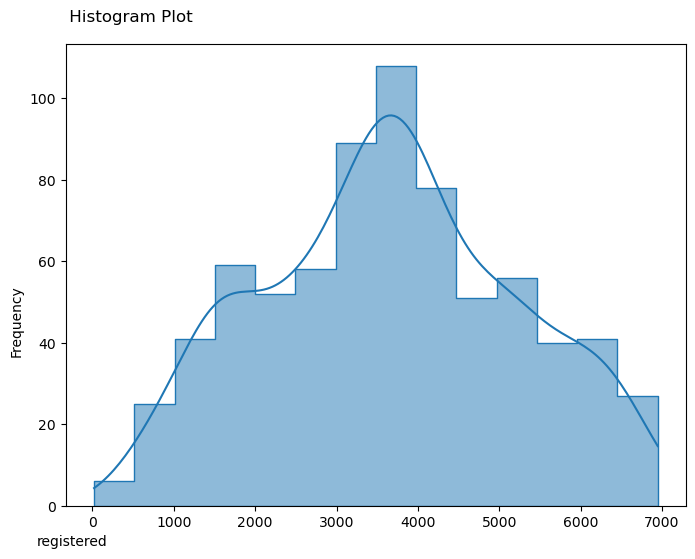

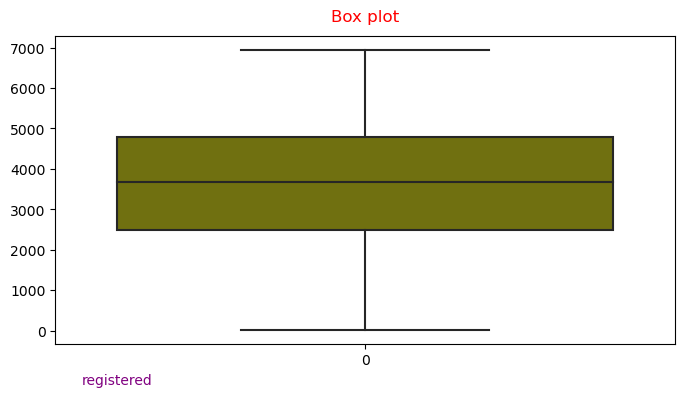

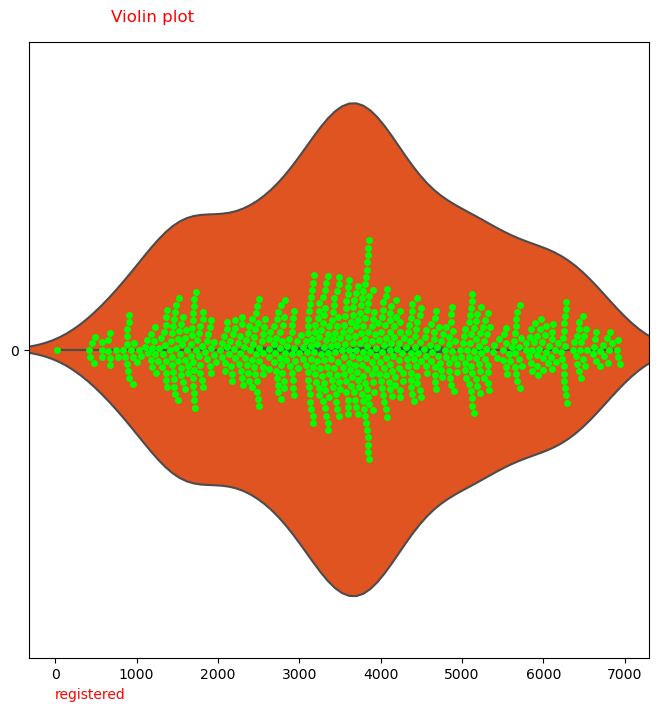

____________________ cnt ____________________
mean of : 4504.3488372093025
min of:  22
max of:  8714
std of  cnt :  1937.2114516187678
variance  of  cnt :  3752788.2082828935
skewness of  cnt :  -0.04735278011900183
Quantile of  cnt :  1746.0 3152.0 4548.0 5956.0 7290.0
Null Percentage of the  cnt :  0.0


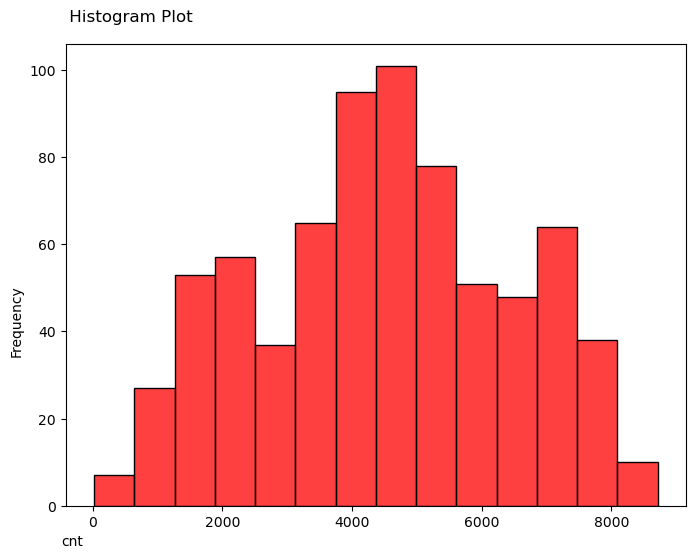

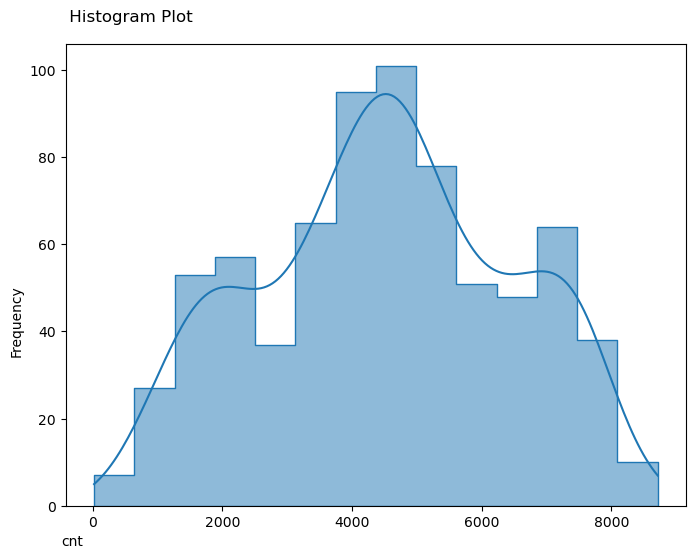

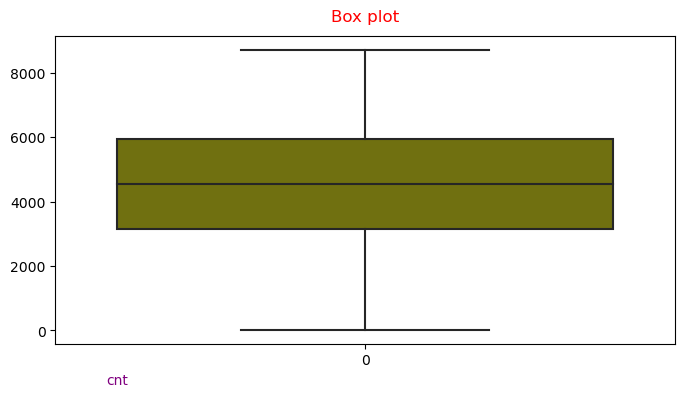

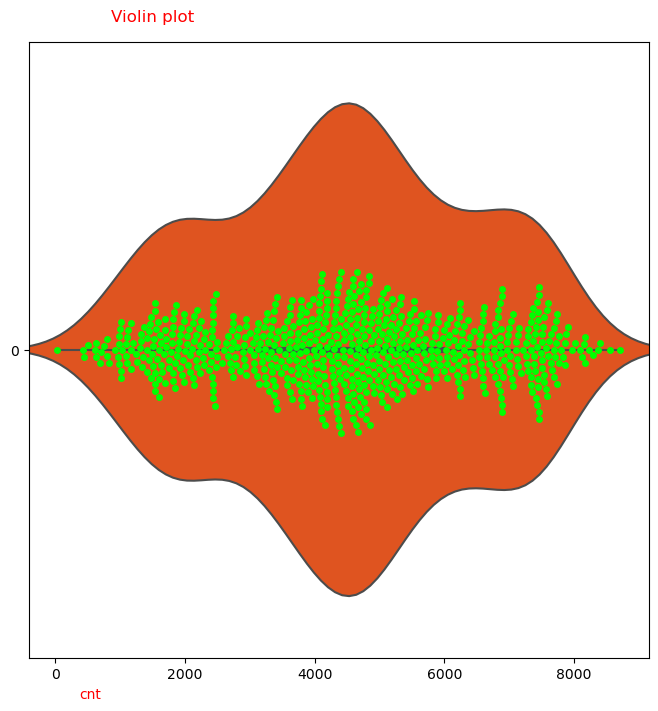

In [28]:
for col in num_cols :
    print ("_"*20,col,"_"*20)
    print("mean of :", df[col].mean())
    print("min of: ",df[col].min())
    print("max of: ",df[col].max())
    print("std of ",col,": ",df[col].std())
    print("variance  of ",col,": ",df[col].var())
    print("skewness of ",col,": ",df[col].skew())
    print ("Quantile of ",col,": ",df[col].quantile(0.10),df[col].quantile(0.25),df[col].quantile(0.50),df[col].quantile(0.75),df[col].quantile(0.90))
    print ("Null Percentage of the ",col,": ",df[col].isnull().sum()/len(col) * 100)

    plt.figure(figsize=(8,6))
    sns.histplot(df[col],color="red")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(col,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()


    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True,element="step")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(col,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()

    plt.figure(figsize=(8,4))
    # Box plot
    sns.boxplot(df[col],orient="V",color= "olive") 
    plt.title("Box plot",y=1.02, color= "red" )
    plt.xlabel(col, x=0.1,color= "purple" )
    # plt.ylabel("")
    plt.show()


    plt.figure(figsize=(8,8))
    # Violin Plot
    sns.violinplot(df[col],orient="h",color="orangered")
    sns.swarmplot( df[col],size=5,orient="h",color="lime")

    plt.title("Violin plot",x=0.2,y=1.02,color="Red" )
    plt.xlabel(col,size=10,x=0.1,color="Red")
    # plt.ylabel("")
    plt.show()

In [29]:
## Conclude and write down your observation.

Numerical Columns Analysis:

The provided data contains several numerical columns: "feellike_temp," "actual_temp," "humidity," "windspeeds," "casual," "registered," and "cnt." Analyzing these columns provides valuable insights that can be used for further analysis.

The "feellike_temp" column shows a mean temperature of 23.72°C, with a minimum of 3.95°C and a maximum of 42.04°C. The standard deviation of 8.15 indicates a moderate variation in the data. The skewness of -0.13 suggests a slightly left-skewed distribution. The quantiles provide information about the distribution across different percentiles.

Similarly, the "actual_temp" column exhibits a mean temperature of 20.31°C, with a range from 2.42°C to 35.33°C. The skewness is close to zero, indicating a nearly symmetrical distribution. The quantiles help understand the spread of temperatures across various percentiles.

The "humidity" column displays a mean humidity of 62.79%, with a range from 0% to 97.25%. The standard deviation of 14.24 suggests a moderate variability. The skewness is close to zero, indicating a roughly symmetric distribution. The quantiles provide information on the humidity levels at different percentiles.

The "windspeeds" column shows a mean wind speed of 12.76 units, with a range from 1.5 to 34. The skewness of 0.68 suggests a moderately right-skewed distribution. The quantiles help identify the wind speed values at various percentiles.

The "casual," "registered," and "cnt" columns represent bike rental counts. These columns have mean values of 848.18, 3656.17, and 4504.35, respectively. The skewness values suggest slightly right-skewed distributions. The quantiles provide information on rental counts at different percentiles.

Overall, the numerical columns analysis provides an understanding of the data distribution and statistical properties. These insights can guide further analysis, such as exploring relationships between variables, identifying outliers, performing hypothesis testing, and building predictive models. The absence of null values in the data is beneficial, ensuring a complete dataset for analysis.

## Do Categortical  Analysis of Columns

In [30]:
#  Categorical column analysis 
#  You can learn about their count values and their percentage.
# value_counts allows you to find the number of each category in the that column.
#  Count plot.

# find no. of unique values and what are those unique values.

#  Word cloud to create most frequently occuring words.

In [31]:
categorical_columns = ['weathersit', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday'] 

In [ ]:
values = [463, 247, 21]
labels = [' Clear, Few clouds, Partly cloudy, Partly cloudy', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist2', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']

season_values = [188,184,181,178]
season_labels =['Fall','Summer','Spring','Winter']

year_values =[366,365]
year_names =[2012, 2011]

month_values =[62,62,62,62,62,62,62,60,60,60,60,57]
month_names =['Janurary','March','May','July','August','October','December','April','June','September','November','Feburary']

holiday_values =[710,21]
holiday_labels =['Non-Holidays','Holidays']

weekday_values =[105,105,105,104,104,104,104,]
weekday_labels =['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

workingday_values = [500,231]
working_labels =['if day is neither weekend nor holiday','otherwise ']

____________________ weathersit ____________________
unique  of:  [2 1 3]
count of :  weathersit
1    463
2    247
3     21
Name: count, dtype: int64
0.0


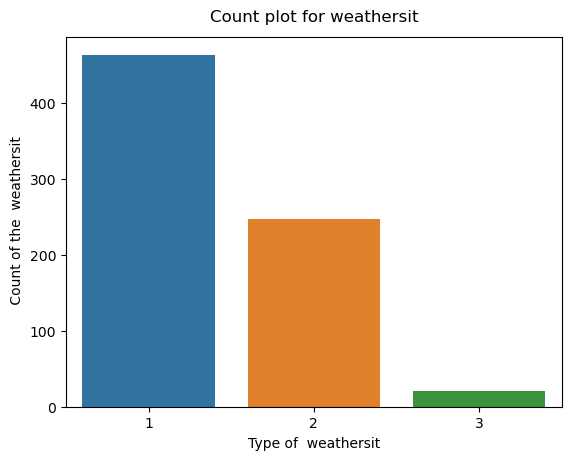

____________________ season ____________________
unique  of:  [1 2 3 4]
count of :  season
3    188
2    184
1    181
4    178
Name: count, dtype: int64
0.0


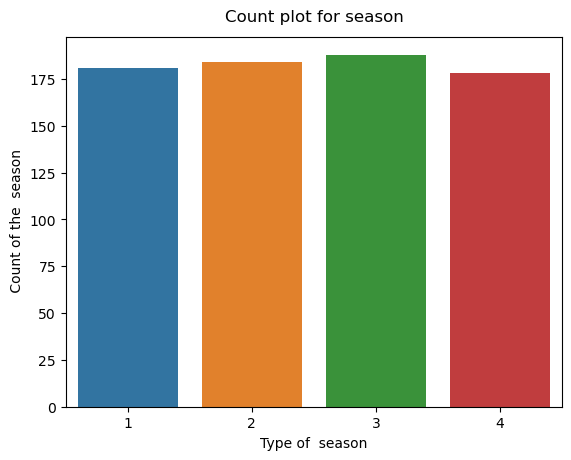

____________________ yr ____________________
unique  of:  [0 1]
count of :  yr
1    366
0    365
Name: count, dtype: int64
0.0


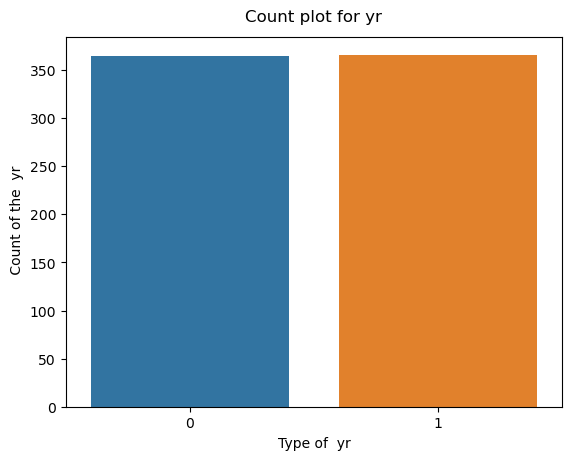

____________________ mnth ____________________
unique  of:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
count of :  mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64
0.0


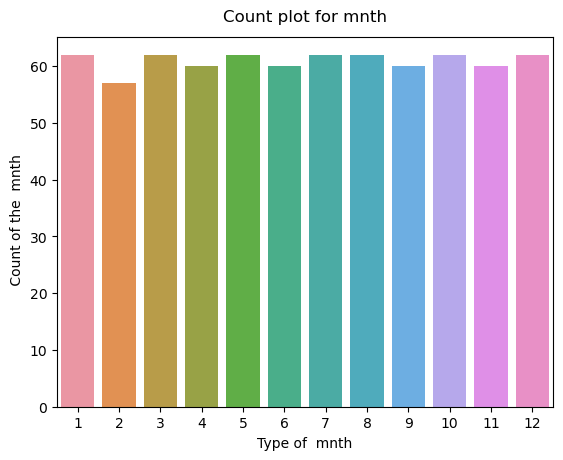

____________________ holiday ____________________
unique  of:  [0 1]
count of :  holiday
0    710
1     21
Name: count, dtype: int64
0.0


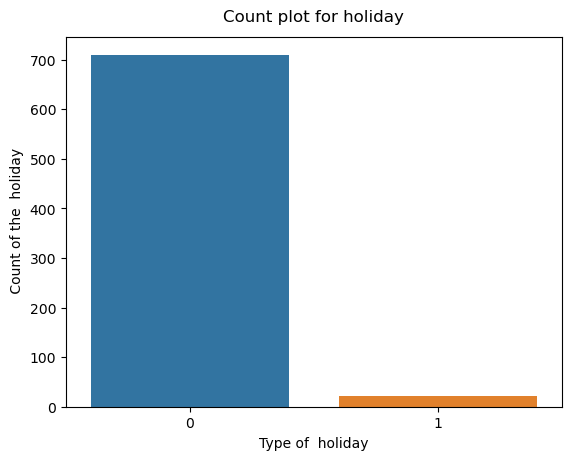

____________________ weekday ____________________
unique  of:  [6 0 1 2 3 4 5]
count of :  weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64
0.0


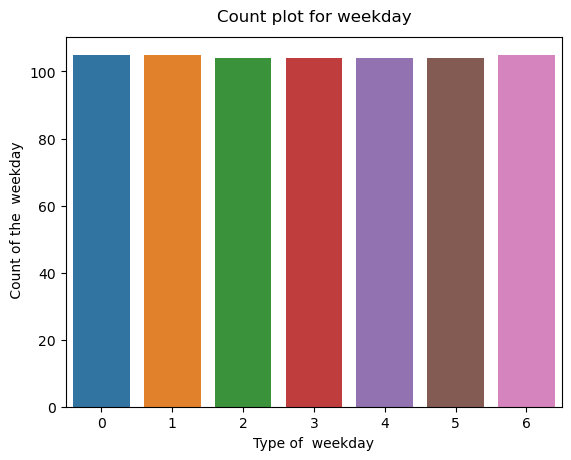

____________________ workingday ____________________
unique  of:  [0 1]
count of :  workingday
1    500
0    231
Name: count, dtype: int64
0.0


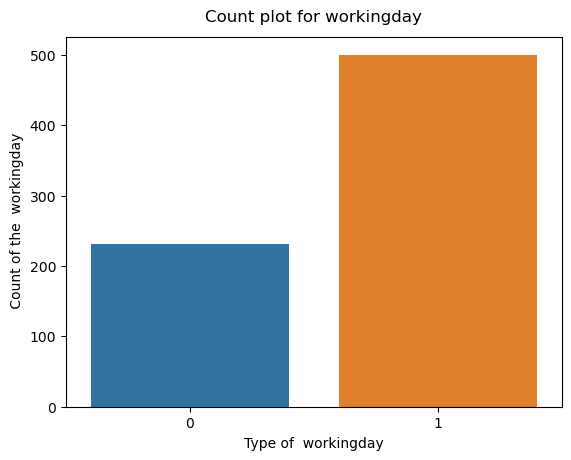

In [32]:
for cat in categorical_columns:
    print ("_"*20,cat,"_"*20)
    print("unique  of: ",df[cat].unique())
    print("count of : ",df[cat].value_counts())
    print (df[cat].isnull().sum()/len(df[cat]) * 100)
    
    sns.countplot(x=df[cat])
    plt.title("Count plot for "+ cat ,y=1.02)
    plt.xlabel("Type of  " + cat)
    plt.ylabel(" Count of the  " + cat )
    plt.show() 

   

weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
values = [463, 247, 21]
labels = [' Clear, Few clouds, Partly cloudy, Partly cloudy', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist2', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']

plt.figure(figsize=(4,6))
# piechart
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title(" Weather Situation ",x=0.1 ,y=1.03)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 1)) # what color is mapped to what values.
plt.show()

In [ ]:
#season : season (1:springer, 2:summer, 3:fall, 4:winter)
  

In [ ]:
season_values = [188,184,181,178]
season_labels =['Fall','Summer','Spring','Winter']

In [ ]:
plt.figure(figsize=(4,6))
plt.pie(season_values, labels=season_labels, autopct='%1.2f%%')
plt.title(" Seasonal Index ",x=0.1 ,y=1.03)
plt.legend(season_labels, loc='center left', bbox_to_anchor=(1, 0.5)) # what color is mapped to what values.
plt.show()

yr : year (0: 2011, 1:2012)
    
dteday : date
    
season : season (1:springer, 2:summer, 3:fall, 4:winter)
    
yr : year (0: 2011, 1:2012)
    
mnth : month ( 1 to 12)
    
hr : hour (0 to 23)
    
holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    
weekday : day of the week 0-monday , 1-tuesday, 2-wednesday, 3-thursday, 4-friday, 5-Saturday ,6-Sunday
    
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.



In [51]:
values = [463, 247, 21]
labels = [' Clear, Few clouds, Partly cloudy, Partly cloudy', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist2', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']

season_values = [188,184,181,178]
season_labels =['Fall','Summer','Spring','Winter']

year_values =[366,365]
year_names =[2012, 2011]

month_values =[62,62,62,62,62,62,62,60,60,60,60,57]
month_names =['Janurary','March','May','July','August','October','December','April','June','September','November','Feburary']

holiday_values =[710,21]
holiday_labels =['Non-Holidays','Holidays']

weekday_values =[105,105,105,104,104,104,104,]
weekday_labels =['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

workingday_values = [500,231]
working_labels =['if day is neither weekend nor holiday','otherwise ']



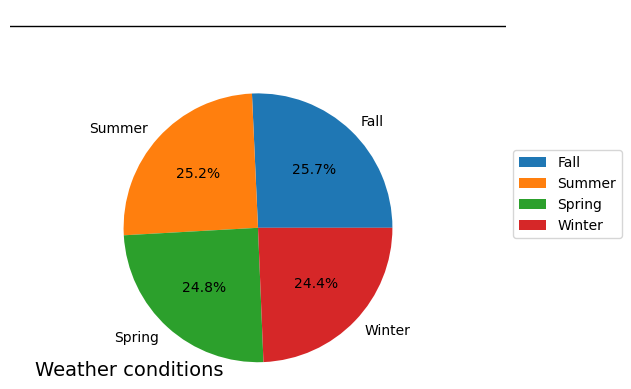

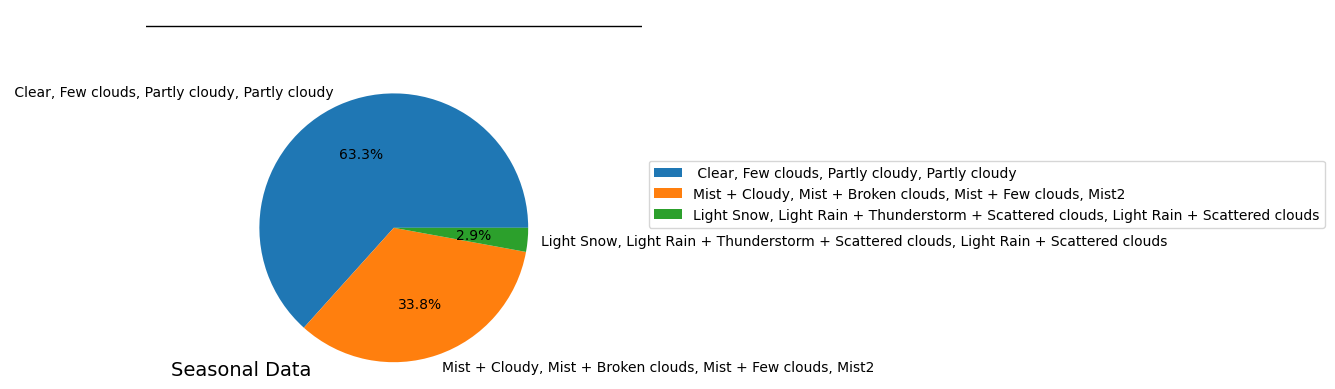

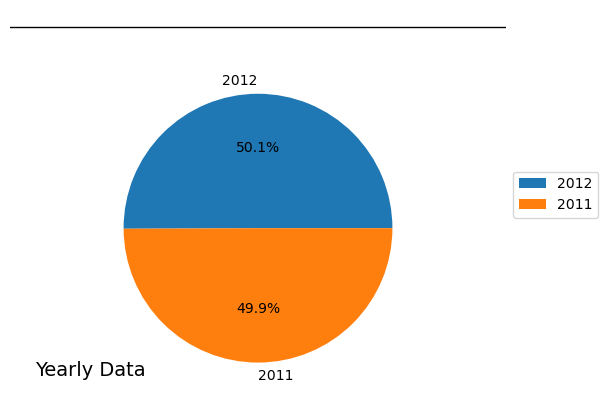

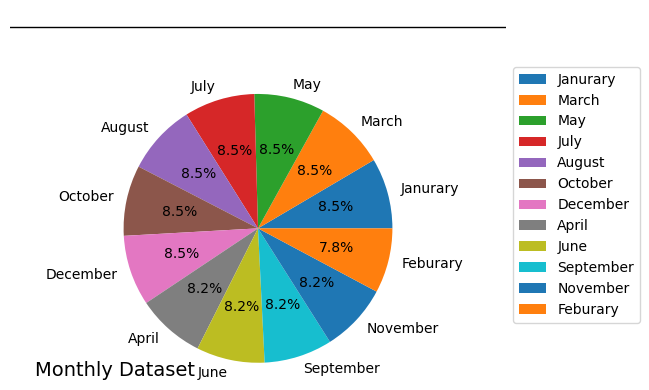

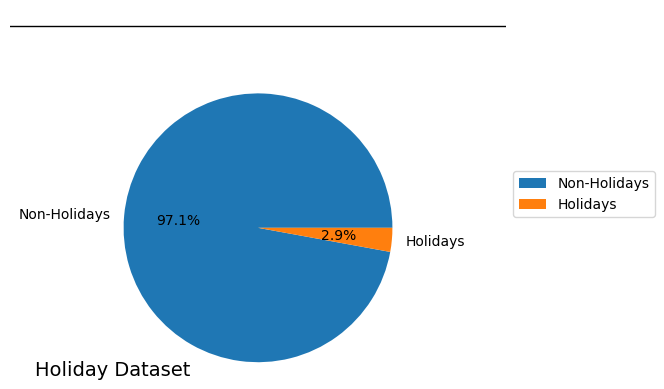

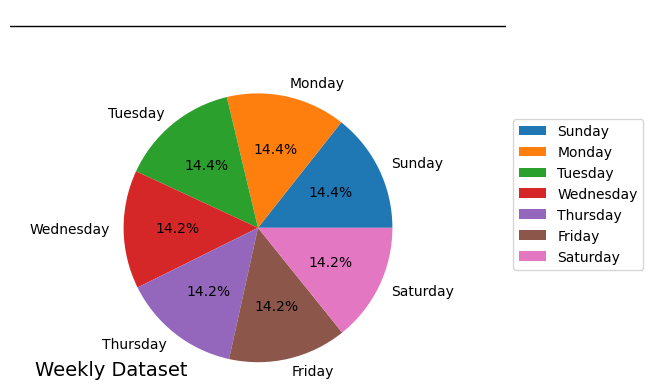

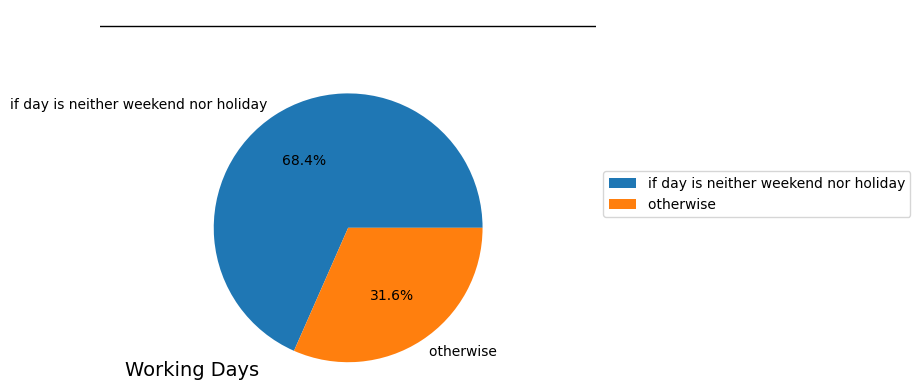

In [53]:
data = [
    (season_values, season_labels, 'Weather conditions'),
    (values, labels, 'Seasonal Data'),
    (year_values, year_names, 'Yearly Data'),
    (month_values, month_names, 'Monthly Dataset'),
    (holiday_values, holiday_labels, 'Holiday Dataset'),
    (weekday_values, weekday_labels, 'Weekly Dataset'),
    (workingday_values, working_labels, 'Working Days')
]

for dataset, labelset, markdown in data:
    plt.figure()
    plt.pie(dataset, labels=labelset, autopct='%1.1f%%')
    plt.text(0.05, 0., markdown, transform=plt.gca().transAxes, fontsize=14, ha='left', va='bottom')
    plt.axis('equal')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axhline(1.5, color='black', linewidth=1)
    plt.gca().axes.get_yaxis().set_visible(False)
    # Add separator line
   
    plt.show()
    
    

In [ ]:
## Conclude and write down your observation.

____________________ weathersit ____________________

The column "weathersit" represents weather situations and has 3 unique values:

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

The count of each weather situation is as follows:

Weather situation 1 appears 463 times.
Weather situation 2 appears 247 times.
Weather situation 3 appears 21 times.

There are no missing values in this column.

____________________ season ____________________

The column "season" represents the seasons and has 4 unique values:

1: Spring
2: Summer
3: Fall
4: Winter

The count of each season is as follows:

Spring appears 181 times.
Summer appears 184 times.
Fall appears 188 times.
Winter appears 178 times.

There are no missing values in this column.

____________________ yr ____________________

The column "yr" represents the year and has 2 unique values:

0: 2011
1: 2012

The count of each year is as follows:

Year 2011 appears 365 times.
Year 2012 appears 366 times.

There are no missing values in this column.

____________________ mnth ____________________

The column "mnth" represents the month and has 12 unique values from January to December. The count of each month is as follows:

January (1) appears 62 times.
February (2) appears 57 times.
March (3) appears 62 times.
April (4) appears 60 times.
May (5) appears 62 times.
June (6) appears 60 times.
July (7) appears 62 times.
August (8) appears 62 times.
September (9) appears 60 times.
October (10) appears 62 times.
November (11) appears 60 times.
December (12) appears 62 times.

There are no missing values in this column.

____________________ holiday ____________________

The column "holiday" indicates whether it is a holiday or not and has 2 unique values:

0: Non-Holiday
1: Holiday

The count of non-holiday days is 710, while the count of holiday days is 21. There are no missing values in this column.

____________________ weekday ____________________

The column "weekday" represents the day of the week and has 7 unique values from Monday to Sunday. The count of each weekday is as follows:

Monday (0) appears 105 times.
Tuesday (1) appears 105 times.
Wednesday (2) appears 105 times.
Thursday (3) appears 104 times.
Friday (4) appears 104 times.
Saturday (5) appears 104 times.
Sunday (6) appears 105 times.

There are no missing values in this column.

____________________ workingday ____________________

The column "workingday" indicates whether it is a working day or not and has 2 unique values:

0: Non-Working Day
1: Working Day

The count of working days is 500, while the count of non-working days is 231. There are no missing values in this column.

The categorical data provided will be valuable for further analysis as they provide information about the weather conditions, seasons, years, months, holidays, weekdays, and working days. This information can be used to explore patterns, trends, and relationships with other variables in the dataset. For example, it could help analyze the impact of weather on bike rentals, compare bike usage between different seasons or years, and understand the preferences of users on holidays or


## Combine Numerical and categorical columns for analysis

__________________________________________________ season __________________________________________________
season
1    14.845580
2    26.015598
3    32.794681
4    20.777416
Name: feellike_temp, dtype: float64


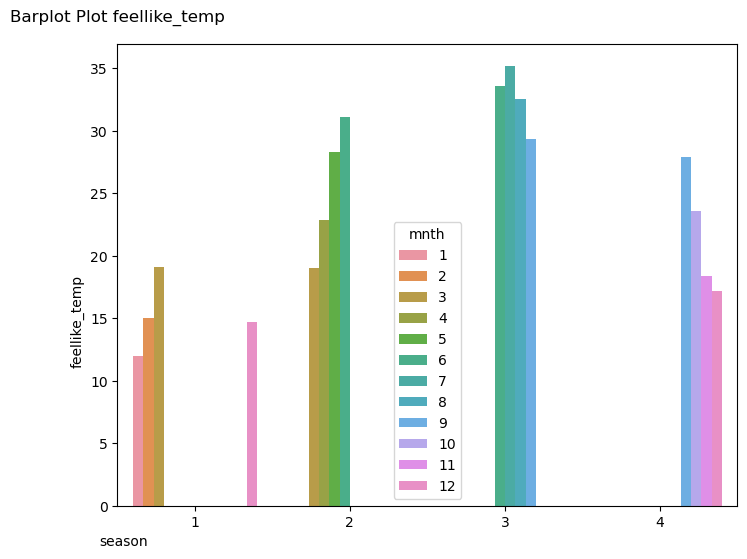

<Figure size 800x600 with 0 Axes>

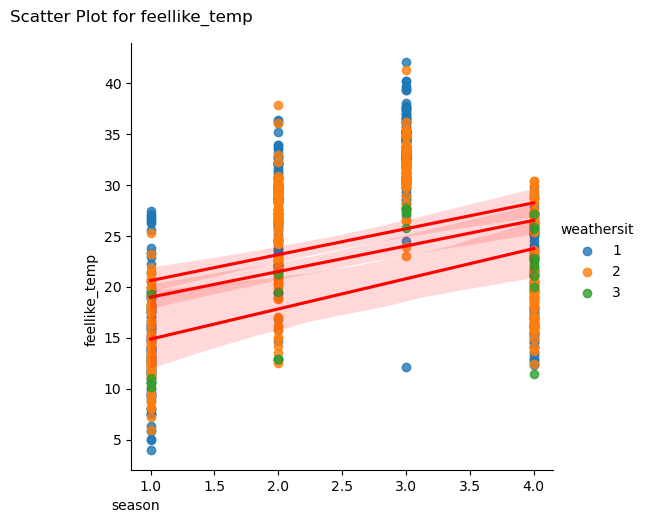

__________________________________________________ yr __________________________________________________
yr
0    19.953205
1    20.667459
Name: actual_temp, dtype: float64


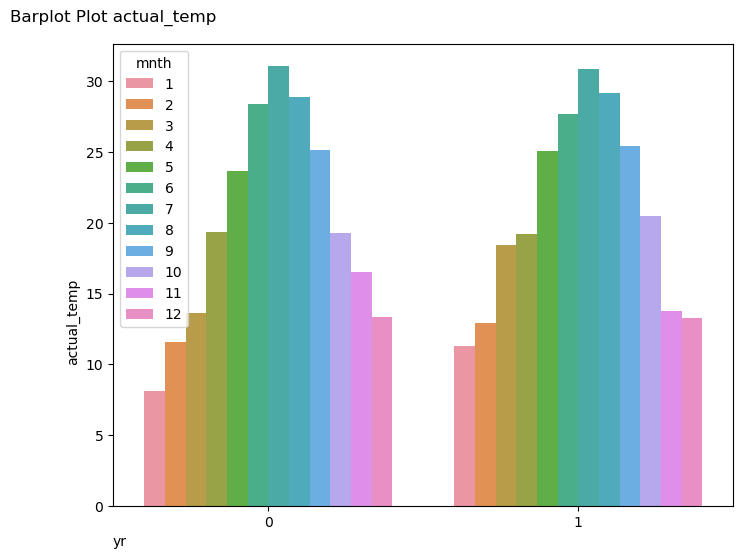

<Figure size 800x600 with 0 Axes>

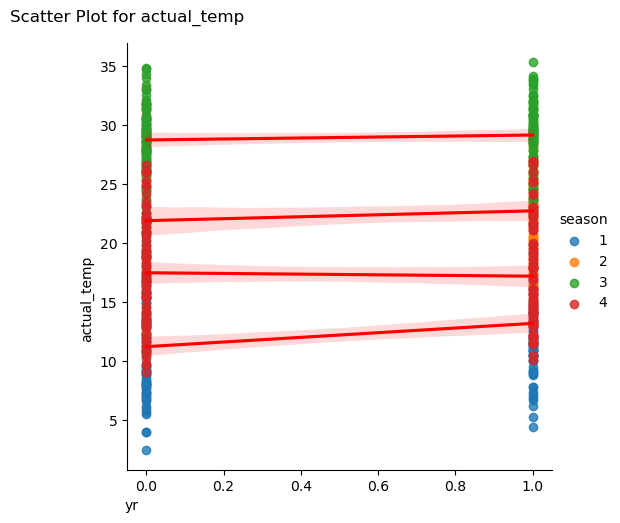

__________________________________________________ mnth __________________________________________________
mnth
1     58.582742
2     56.745965
3     58.847581
4     58.806167
5     68.896129
6     57.580333
7     59.787258
8     63.772903
9     71.471833
10    69.376129
11    62.488000
12    66.603710
Name: humidity, dtype: float64


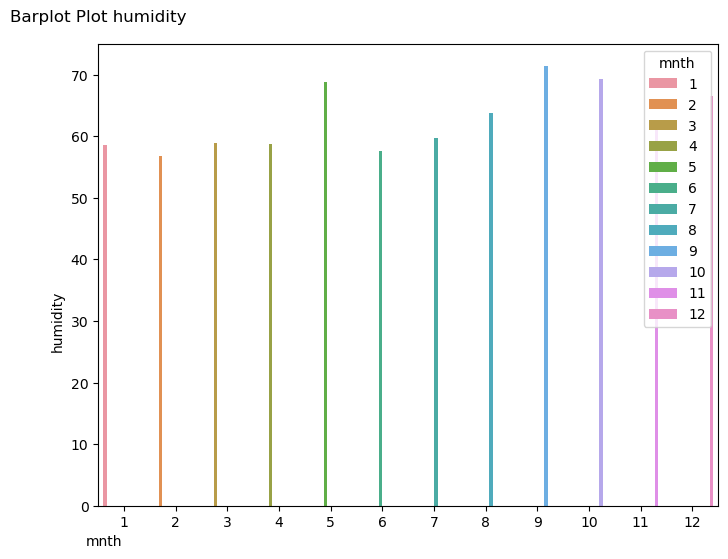

<Figure size 800x600 with 0 Axes>

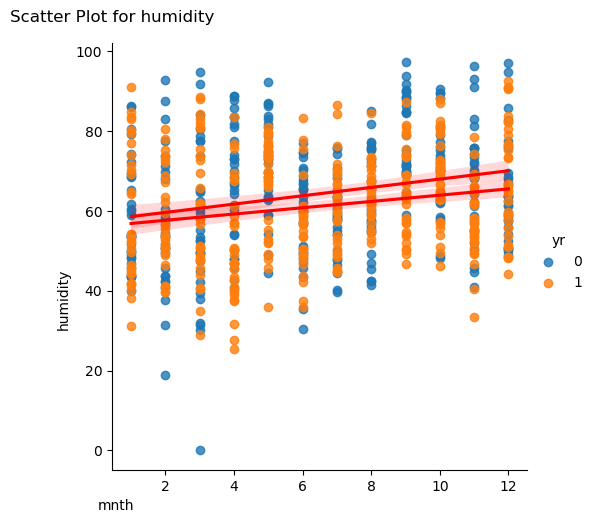

__________________________________________________ holiday __________________________________________________
holiday
0    12.757042
1    12.952381
Name: windspeeds, dtype: float64


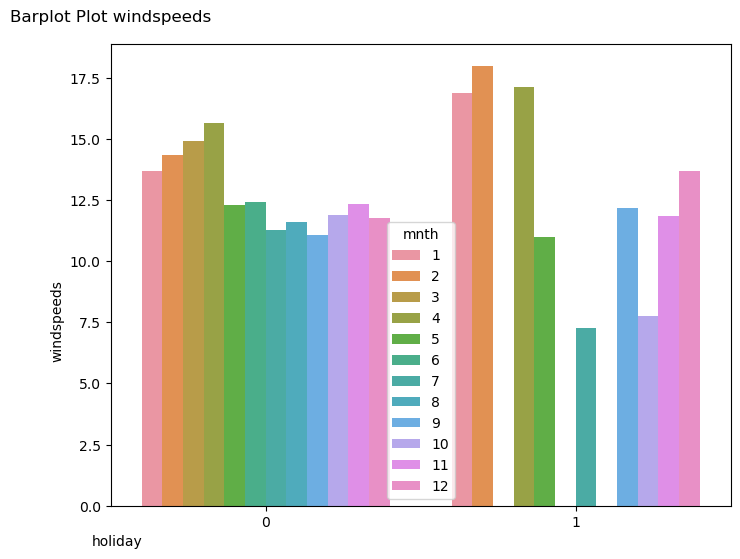

<Figure size 800x600 with 0 Axes>

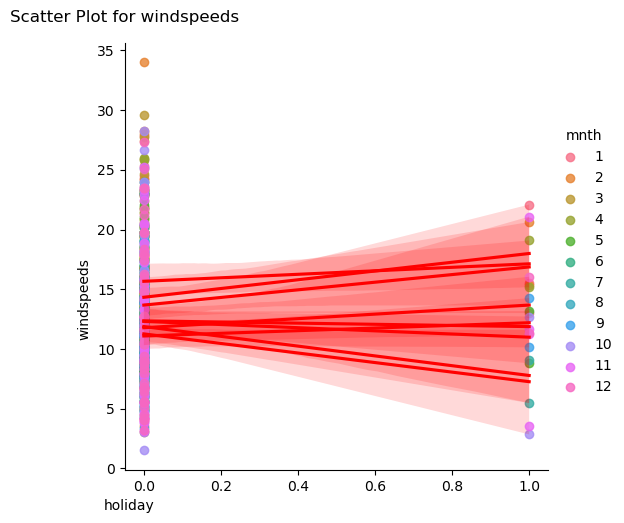

__________________________________________________ weekday __________________________________________________
weekday
0    1338.295238
1     674.133333
2     556.182692
3     551.144231
4     590.961538
5     752.288462
6    1465.257143
Name: casual, dtype: float64


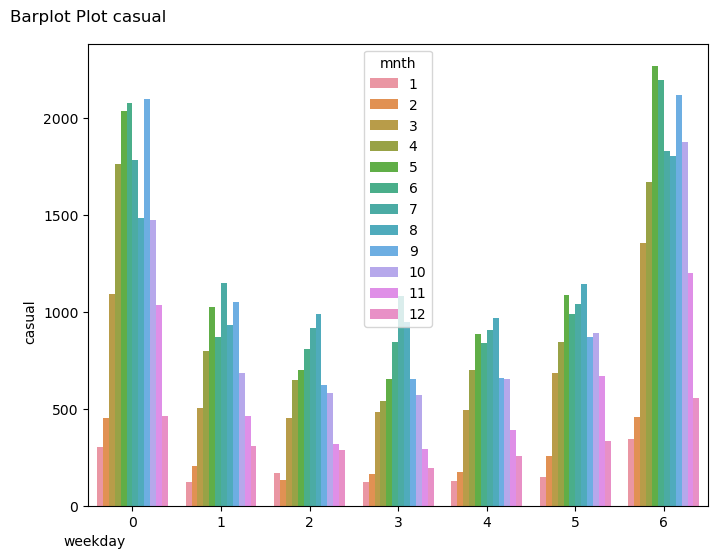

<Figure size 800x600 with 0 Axes>

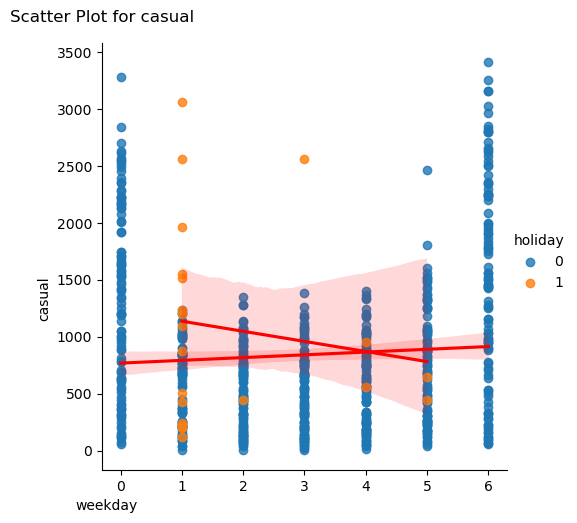

__________________________________________________ workingday __________________________________________________
workingday
0    2959.034632
1    3978.250000
Name: registered, dtype: float64


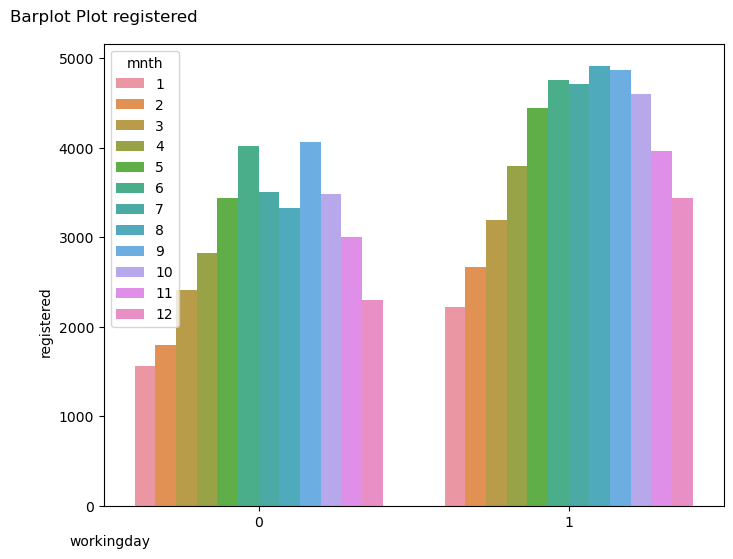

<Figure size 800x600 with 0 Axes>

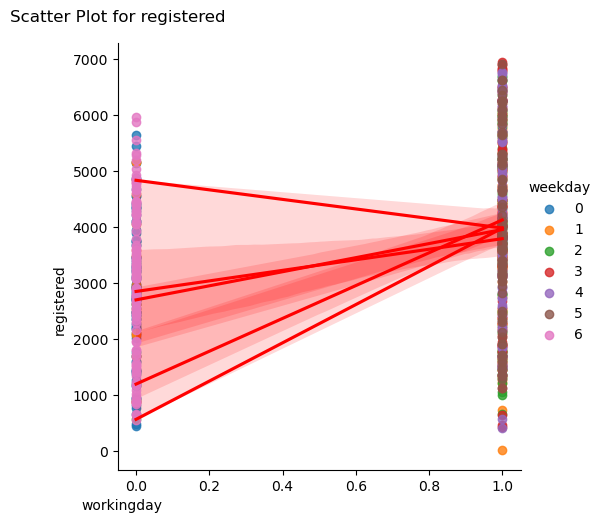

In [57]:
categorical_columns = [ 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']
num_cols = ['feellike_temp', 'actual_temp', 'humidity', 'windspeeds', 'casual', 'registered', 'cnt']

labels_for_columns = {
    'weathersit': ['Clear, Few clouds, Partly cloudy, Partly cloudy',
                   'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                   'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'," Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"],
    'season': ['Spring', 'Summer', 'Fall', 'Winter'],
    'yr': [2011, 2012],
    'mnth': ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December'],
    'holiday': ['Non-Holiday', 'Holiday'],
    'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'workingday': ['Non-Working Day', 'Working Day']
}

for cat, col, lab in zip(categorical_columns, num_cols, labels_for_columns):
    print("_" * 50, cat, "_" * 50)

    print(df.groupby([cat])[col].mean())

    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x=cat, y=col, hue='mnth', errorbar=None)
    plt.title("Barplot Plot " + col, x=0, y=1.03)
    plt.xlabel(cat, x=0.01, y=1.02)
    #plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.ylabel(col, y=0.4)
    
    # Use labels from the dictionary for the hue variable
    #if lab in labels_for_columns:
     #   labels = labels_for_columns[lab]
     #   plt.legend(labels=labels,bbox_to_anchor=(1.02, 1))
    
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.lmplot(data=df, x=cat, y=col, hue=lab, line_kws={"color": 'red'})
    plt.title("Scatter Plot for " + col, x=0, y=1.03)
    plt.xlabel(cat, x=0.01, y=1.02)
    #plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.ylabel(col, y=0.4)
    
    # Use labels from the dictionary for the hue variable
    #if lab in labels_for_columns:
    #    labels = labels_for_columns[lab]
    #    plt.legend(labels=labels)
    
    plt.show()

   #g = sns.FacetGrid(data=df, col=cat, row=lab, hue=lab, margin_titles=True, height=6)
   #g.map(sns.scatterplot, col)
    #######plt.figure(figsize=(10, 10))
    ######g.add_legend(loc='center right', bbox_to_anchor=(1, 0.5))
    #####plt.show()

   #### g = sns.FacetGrid(data=df, col=cat, row=lab, margin_titles=True, height=4)
   ### g.map_dataframe(sns.histplot, x=col)
   ##g.add_legend(loc='center right', bbox_to_anchor=(1, 0.5))
   # plt.show()

In [ ]:
data = df[['feellike_temp', 'actual_temp', 'humidity', 'windspeeds', 'casual', 'registered', 'cnt','season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']].corr() #.corr() to get correlation
data

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data,cmap= "RdYlGn", annot=True,linewidth=.5)

## Add your own Questions

# Data Cleaning

## 1. Handling Duplicate data

In [ ]:
## Check shape of original data

In [58]:
df.shape

(731, 14)

In [ ]:
## Drop duplicate values and reset your index columns.

In [59]:
df = df.drop_duplicates(keep='last').reset_index(drop=True)

In [ ]:
## Check shape after applying drop duplicates.

In [60]:
df.shape

(731, 14)

In [ ]:
## Conslusion or what you have done for achieving this.

## 2.  Handling Missing Values

In [ ]:
## Apply isnull() function and find the sum of missing values in all columns.

In [61]:
df.isnull()

,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt,actual_temp,feellike_temp,humidity,windspeeds
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
## Find missing value in % form.

In [62]:
df.isnull().sum()

season           0
yr               0
mnth             0
holiday          0
weekday          0
workingday       0
weathersit       0
casual           0
registered       0
cnt              0
actual_temp      0
feellike_temp    0
humidity         0
windspeeds       0
dtype: int64

In [ ]:
## Conclude your finding on missing values.

In [ ]:
## Drop the columns based on above analysis.

In [ ]:
## Conslusion or what you have done for achieving this.

## 3. Handling Outliers 

In [ ]:
## Apply below techniques on numerical columns.

# Do box plot and violin plot to identify outliers.

# Q1 --> 25%ile of data 
#     first line of the box plot
# Q2 --> median or 50%ile of data
#     second line or middle line of the box.
# Q3 --> 75%ile of data   
#     third line or the last of the box.

# IQR --> Interquartile range.
#      distance/value between Q1 or 25%ile and Q3 or 75%ile
#     IQR = Q3-Q1
    
# minimum whisker --> Q1 - 1.5*IQR
# maximum whisker --> Q3 + 1.5*IQR

# Any value below mimimum whisker and above maximum whisker are termed as outlier.

In [63]:
num_cols = ['feellike_temp', 'actual_temp', 'humidity', 'windspeeds', 'casual', 'registered', 'cnt']

__________________________________________________ feellike_temp __________________________________________________
Q1 for feellike_temp: 16.895
Q2 for feellike_temp: 24.34
Q3 for feellike_temp: 30.43
Interquartile range  for feellike_temp: 13.535
Median value for feellike_temp: 24.34
Minimum Whisker  for feellike_temp: -3.4075000000000024
Maximum Whisker  for feellike_temp: 50.7325
Outlier count for feellike_temp: 0.0
Outlier percentage for feellike_temp: 0.00%


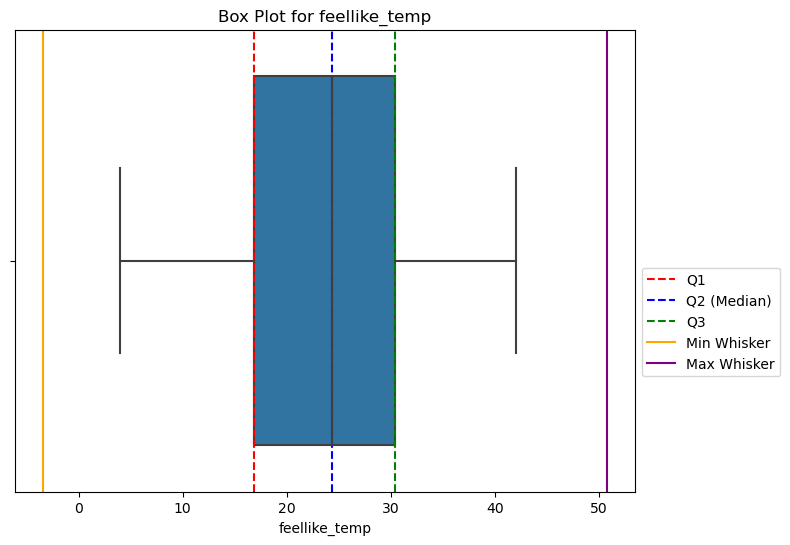

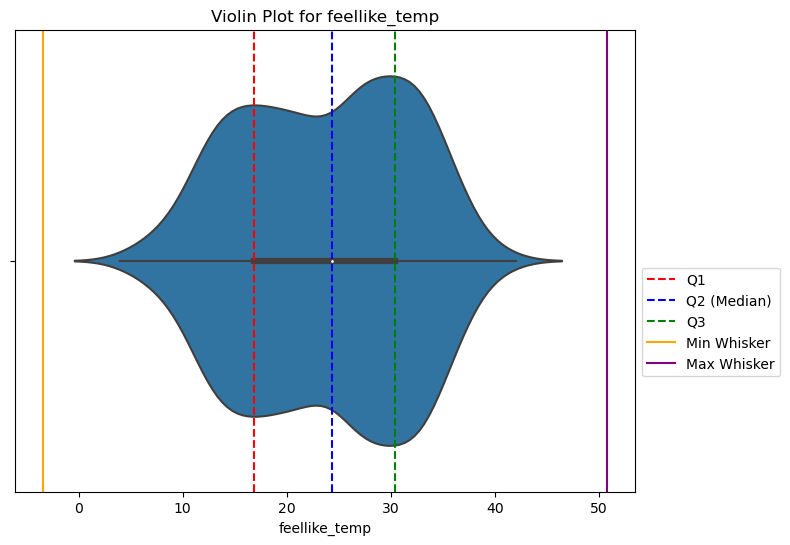

__________________________________________________ actual_temp __________________________________________________
Q1 for actual_temp: 13.82
Q2 for actual_temp: 20.43
Q3 for actual_temp: 26.875
Interquartile range  for actual_temp: 13.055
Median value for actual_temp: 20.43
Minimum Whisker  for actual_temp: -5.762499999999999
Maximum Whisker  for actual_temp: 46.457499999999996
Outlier count for actual_temp: 0.0
Outlier percentage for actual_temp: 0.00%


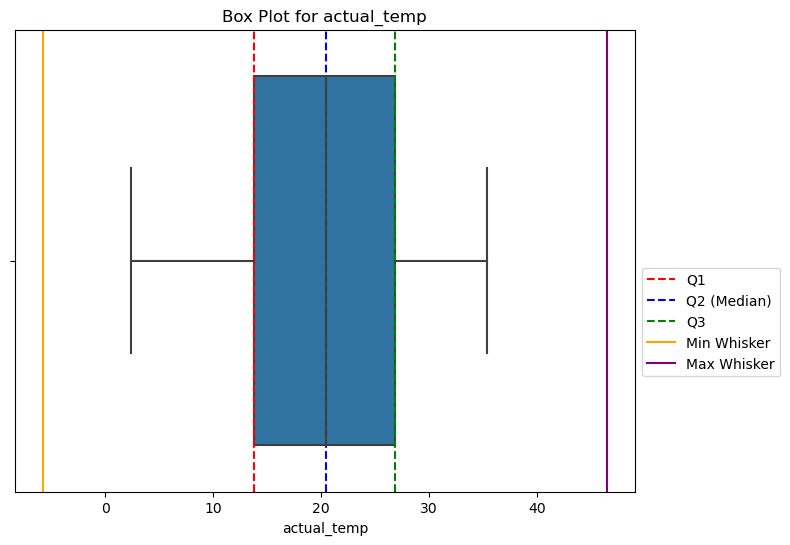

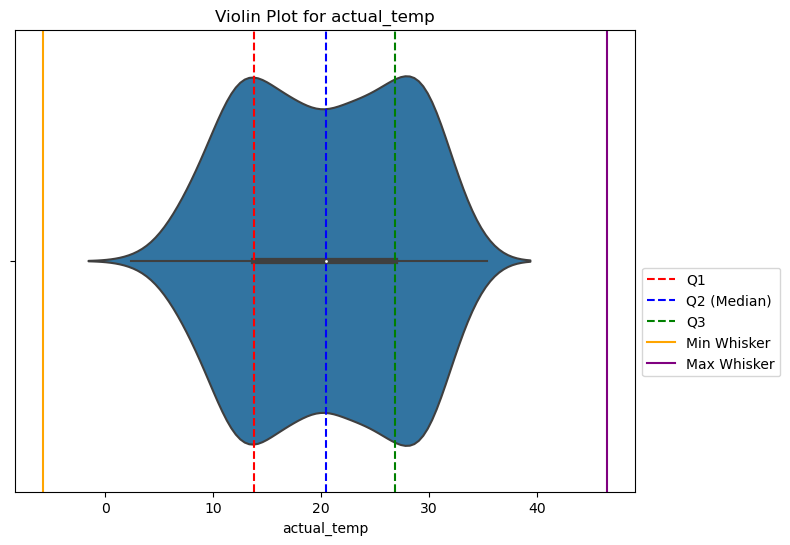

__________________________________________________ humidity __________________________________________________
Q1 for humidity: 52.0
Q2 for humidity: 62.67
Q3 for humidity: 73.02000000000001
Interquartile range  for humidity: 21.02000000000001
Median value for humidity: 62.67
Minimum Whisker  for humidity: 20.469999999999985
Maximum Whisker  for humidity: 104.55000000000003
Outlier count for humidity: 18.79
Outlier percentage for humidity: 2.57%


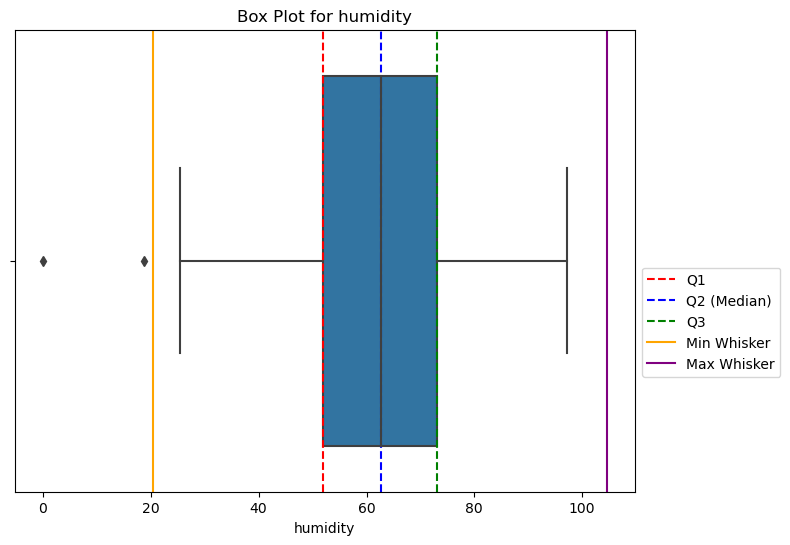

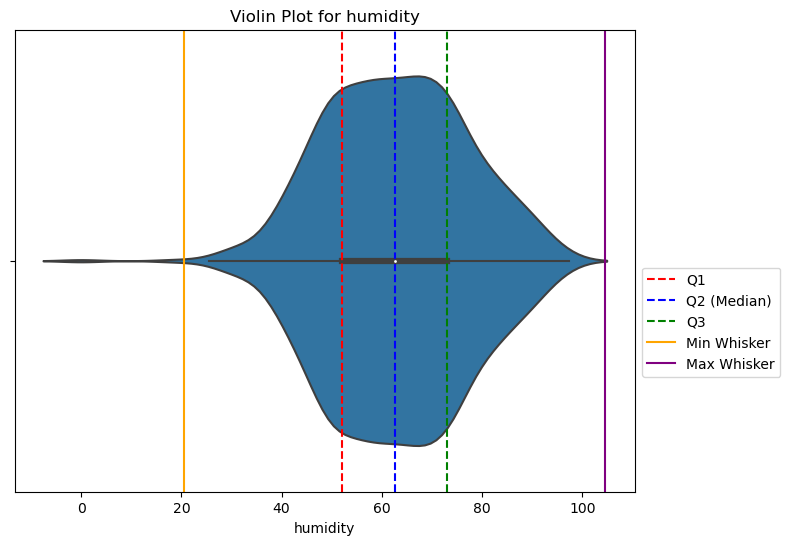

__________________________________________________ windspeeds __________________________________________________
Q1 for windspeeds: 9.04
Q2 for windspeeds: 12.13
Q3 for windspeeds: 15.625
Interquartile range  for windspeeds: 6.585000000000001
Median value for windspeeds: 12.13
Minimum Whisker  for windspeeds: -0.8375000000000021
Maximum Whisker  for windspeeds: 25.5025
Outlier count for windspeeds: 362.87000000000006
Outlier percentage for windspeeds: 49.64%


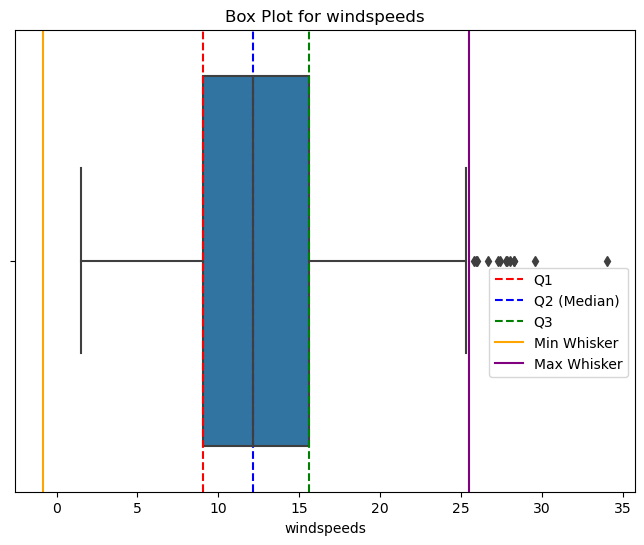

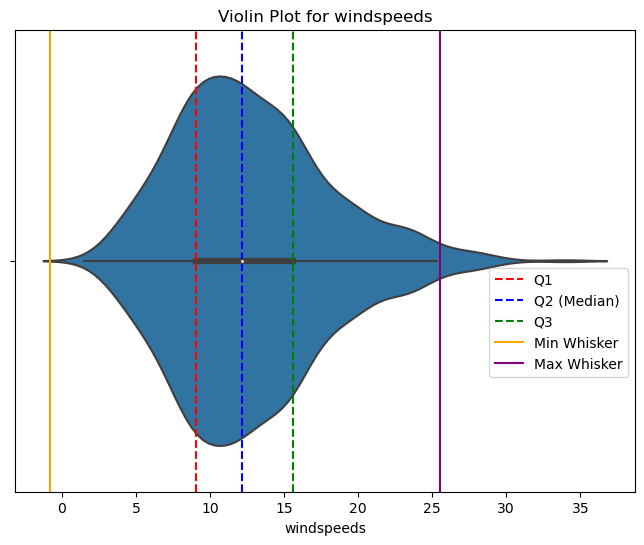

__________________________________________________ casual __________________________________________________
Q1 for casual: 315.5
Q2 for casual: 713.0
Q3 for casual: 1096.0
Interquartile range  for casual: 780.5
Median value for casual: 713.0
Minimum Whisker  for casual: -855.25
Maximum Whisker  for casual: 2266.75
Outlier count for casual: 117126
Outlier percentage for casual: 16022.71%


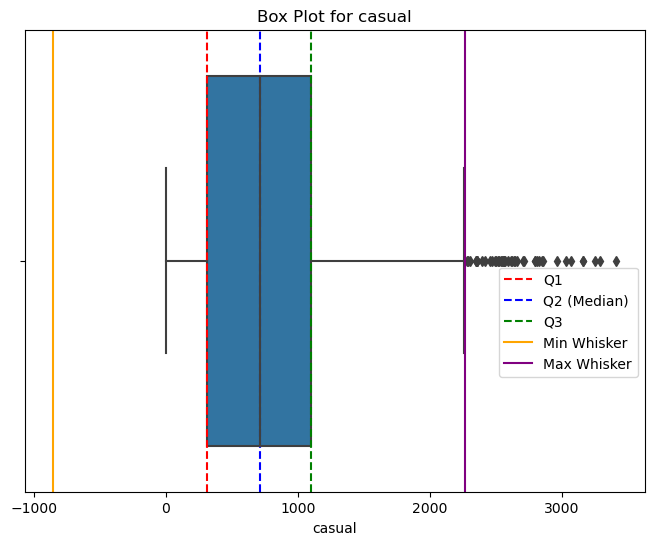

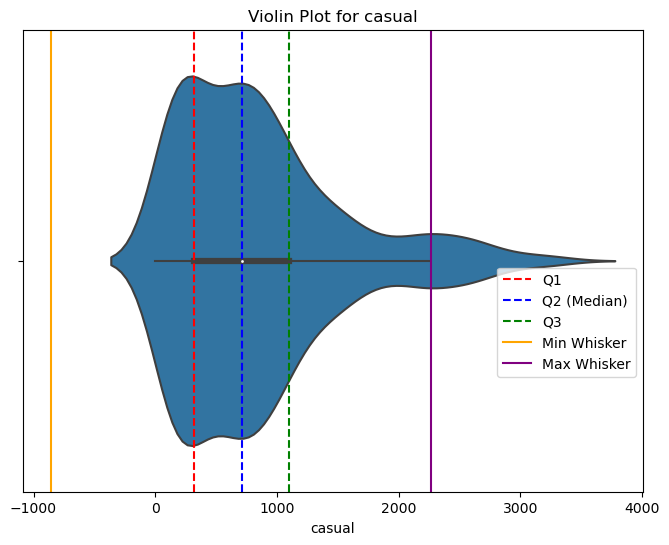

__________________________________________________ registered __________________________________________________
Q1 for registered: 2497.0
Q2 for registered: 3662.0
Q3 for registered: 4776.5
Interquartile range  for registered: 2279.5
Median value for registered: 3662.0
Minimum Whisker  for registered: -922.25
Maximum Whisker  for registered: 8195.75
Outlier count for registered: 0
Outlier percentage for registered: 0.00%


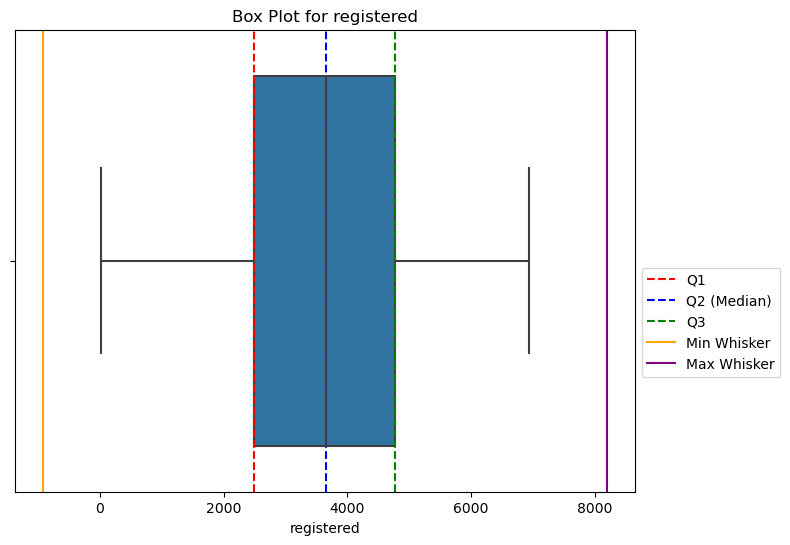

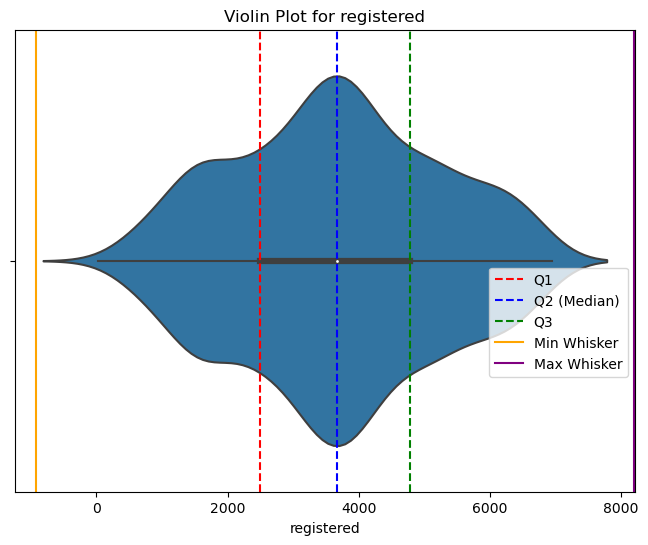

__________________________________________________ cnt __________________________________________________
Q1 for cnt: 3152.0
Q2 for cnt: 4548.0
Q3 for cnt: 5956.0
Interquartile range  for cnt: 2804.0
Median value for cnt: 4548.0
Minimum Whisker  for cnt: -1054.0
Maximum Whisker  for cnt: 10162.0
Outlier count for cnt: 0
Outlier percentage for cnt: 0.00%


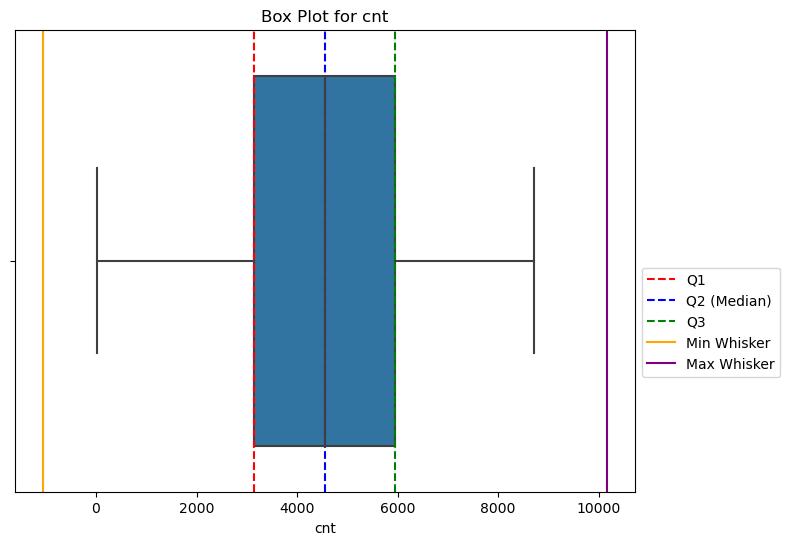

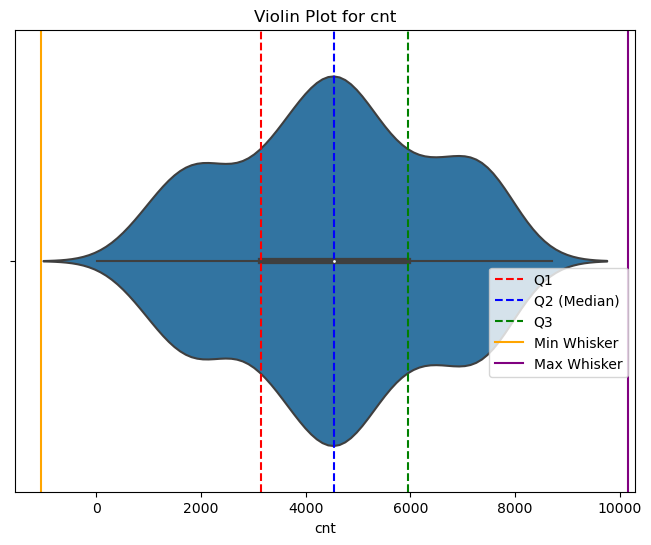

In [64]:
#Loop is created to find the Outliers for all the numerical columns 
for col in num_cols:
    print ("_"*50,col,"_"*50)
    # Calculated the  quartiles and interquartile range
    # f: Specifies that the number should be formatted as a fixed-point number.
    q1 = df[col].quantile(0.25)
    print(f"Q1 for {col}: {q1}")
    q2 = df[col].median()
    print(f"Q2 for {col}: {q2}")
    q3 = df[col].quantile(0.75)
    print(f"Q3 for {col}: {q3}")
    iqr = q3 - q1
    print(f"Interquartile range  for {col}: {iqr}")
    
    # Calculated the median Value for the column 
    
    print(f"Median value for {col}: {q2}")
    
    # Calculated the minimum and maximum whiskers for detecting Outliers 
    min_whisker = df[col].quantile(0.25) - 1.5 * iqr
    print(f"Minimum Whisker  for {col}: {min_whisker}")
    max_whisker = df[col].quantile(0.75) + 1.5 * iqr
    print(f"Maximum Whisker  for {col}: {max_whisker}")
    
    # Detection of the outliers and the count of the outliers 
    outliers = df[(df[col] < min_whisker) | (df[col] > max_whisker)][col]
    
    # Sum of the outliers
    outlier_count = outliers.sum()
    print(f"Outlier count for {col}: {outlier_count}")
    
    # the percentage of outliers
    outlier_percentage = (outlier_count / len(df[col])) * 100
    print(f"Outlier percentage for {col}: {outlier_percentage:.2f}%")
    
    
    # Create box plot is created to visualize the standard dev and the different quartile range with giving the different vertical axis lines  to visualize more easily 
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col,hue=categorical_columns,data=df)
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.axvline(x=q1, linestyle='--', color='red', label='Q1')
    plt.axvline(x=q2, linestyle='--', color='blue', label='Q2 (Median)')
    plt.axvline(x=q3, linestyle='--', color='green', label='Q3')
    plt.axvline(x=min_whisker, linestyle='-', color='orange', label='Min Whisker')
    plt.axvline(x=max_whisker, linestyle='-', color='purple', label='Max Whisker')
    plt.legend( bbox_to_anchor=(1, 0.5))
    plt.show()

    # Create violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot for {col}")
    plt.xlabel(col)
    plt.axvline(x=q1, linestyle='--', color='red', label='Q1')
    plt.axvline(x=q2, linestyle='--', color='blue', label='Q2 (Median)')
    plt.axvline(x=q3, linestyle='--', color='green', label='Q3')
    plt.axvline(x=min_whisker, linestyle='-', color='orange', label='Min Whisker')
    plt.axvline(x=max_whisker, linestyle='-', color='purple', label='Max Whisker')
    plt.legend( bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
## Based on your anlysis either drop extreme values or substitute them with more acceptable value.

In [ ]:
## Conslusion or what you have done for achieving this.

## 4. Handling Categorical Values

In [ ]:
## Idea is be to convert these string like values to number.
## Collect all Categorical column

In [65]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt,actual_temp,feellike_temp,humidity,windspeeds
0,1,0,1,0,6,0,2,331,654,985,14.11,18.18,80.58,10.75
1,1,0,1,0,0,0,2,131,670,801,14.90,17.69,69.61,16.65
2,1,0,1,0,1,1,1,120,1229,1349,8.05,9.47,43.73,16.64
3,1,0,1,0,2,1,1,108,1454,1562,8.20,10.61,59.04,10.74
4,1,0,1,0,3,1,1,82,1518,1600,9.31,11.46,43.70,12.52


In [ ]:
# Ordinal --> Something that shows order.
# e.g. 
# level of education.
# 10th,12th,Diploma,Graduation, Masters,Phd
# 1,2,3,4,5,6

# shopping for clothes t-shirts,
# XS,S,M,L,XL,XXL
# 1,2,3,4,5,6


# -- category encoding
# -- mapping of values to number in some order.

In [ ]:
categorical_columns = [ 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']

In [ ]:
# Nominal --> Something which doesn't show order.
# e.g.
# cities in India
# delhi,mumbai,kolkatta,pune,chennai,hyderabad,bangalore

# subject of education
# physics,mathematics,chemistry,commerce,biology,english,hindi,sanskrit

# gender of human
# male, female


# sex        sex_male , sex_female
# male          1     ,   0
# female        0     ,   1 
# male          1     ,   0
# male          1     ,   0


# -- One-hot encoding.
# by which we convert the individual values in the column to a new column
# by making available value for row as 1 and other as 0.

# different ways of applying one-hot encoding:
#     1. to apply using pandas pd.get_dummies
#     2. to is sklearn (scientic package for mode building).
    
# there is a limitation of one-hot encoding.
# Suppose there is a data which 100000 row and has a column city which 1000 unique city.

# no. of unique values in a categorical coilumn is reffered to as cardinality.
# if a caloumn has 5-7 uniques values they are reffred to as medium to low cardinality.
# if this no. increase to more than 10 then it becomes high cardinarility.

# Cardinality of nominal values values are high.
# there is a limitation of one-hot encoding.
# Suppose there is a data which 100000 row and has a column city which 1000 unique city.

# -- frequency encoding
# city     city
# pune     0.14 
# ...
# ...
# delhi    0.26
# etc.

# value_counts() 
# use frequency of how many times pune has occured 1200 or in % form.

# -- target-mean encoding
# city       survived
# pune          1 
# ...           0   
# delhi
# bangalore
# ...
# etc.

# link for different technique.
# http://contrib.scikit-learn.org/category_encoders/

In [ ]:
## Conslusion or what you have done for achieving this.

## 5 . Handling Numerical values

In [ ]:
## Whether the data is symmetrical or not.
## Plot histogram and distribution plot.

In [ ]:
## If your data is not skwed and symmetrical apply standard scaler.

In [ ]:
## Confirm the distribution patter by Plot histogram and distribution plot again.

In [ ]:
## If your data is skwed and non-symmetrical apply min-max scaler.

In [ ]:
## Confirm the distribution patter by Plot histogram and distribution plot again.

In [ ]:
## Conslusion or what you have done for achieving this.

# Model Building